# PRCP - 1027 - Skin Disorder Classification

## Problem Statement 

**Task 1:** Prepare a complete data analysis report on the given data.

**Task 2:** Create a predictive model  using machine learning techniques to predict the various classes of skin disease. 

**Task3:** Suggestions to the Doctors to identify the skin diseases of the patient at the earliest. 


## Dataset Information

This database contains 34 attributes, 33 of which are linear valued and one of them is nominal.The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences. 
**The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris.** 

Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well. Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages. Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features. The values of the **histopathological features(Histopathology means using a microscope to look at human tissue to see if it has signs of diseases, damage, or other abnormalities. Histology is the study of tissues, and pathology is the study of disease)** are determined by an analysis of the samples under a microscope.

In the dataset constructed for this domain, the **family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise.**

The age feature simply represents the age of the patient.

**Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.**

### Required Library Import

In [1]:
# for data manupulation
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

### Data Reading

In [2]:
df = pd.read_csv('skin_disorder.csv')
df

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                    0                   0                         0   
1                    0                   0                         0   
2                    3                   0                         3   
3                    0                   0                         0   
4                    2                   0                         2   
..                 ...                 ...                       ...   
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
0                             1                  0  ...   
1                             1                  1  ...   
2                             0                  0  ...   
3                             3                  2  ...   
4                             0                  0  ...   
..                          ...                ...  ...   
361                           0                  0  ...   
362                           0                  0  ...   
363                           0                  0  ...   
364                           0                  0  ...   
365                           3                  3  ...   

     disappearance_of_the_granular_layer  \
0                                      0   
1                                      0   
2                                      0   
3                                      3   
4                                      2   
..                                   ...   
361                                    0   
362                                    1   
363                                    0   
364                                    0   
365                                    2   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                          0           3   
1                                          0           0   
2                                          2           3   
3                                          0           0   
4                                          3           2   
..                                       ...         ...   
361                                        0           1   
362                                        0           1   
363                                        3           0   
364                                        2           0   
365                                        0           0   

     saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                                0                     0   
1                                0                     0   
2                                2                     0   
3                                0                     0   
4   

### Basic Checks

In [ ]:
# columns in the dataset
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [ ]:
# shape of dataset
df.shape

(366, 35)

In [ ]:
# Top 5 rows of dataset
df.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   
2                           0                  0  ...   
3                           3                  2  ...   
4                           0                  0  ...   

   disappearance_of_the_granular_layer  \
0                                    0   
1                                    0   
2                                    0   
3                                    3   
4                                    2   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                              0                     0   
1                              0                     0   
2                              2                     0   
3                              0                     0   
4                              3                     0   

   perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
0                             0                                    1   
1                             0                                    1   
2                             0                                    2   
3                             0                                    3   
4                             0                                    2   

   band-like_infiltrate  Age  class  
0                     0   55      2  
1                     0    8      1  
2                     3   26      3  
3                     0   40      1  
4                     3   45      3  

[5 rows x 35 columns]

In [ ]:
# Bottom 5 rows of dataset
df.tail()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
361                           0                  0  ...   
362                           0                  0  ...   
363                           0                  0  ...   
364                           0                  0  ...   
365                           3                  3  ...   

     disappearance_of_the_granular_layer  \
361                                    0   
362                                    1   
363                                    0   
364                                    0   
365                                    2   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
361                                        0           1   
362                                        0           1   
363                                        3           0   
364                                        2           0   
365                                        0           0   

     saw-tooth_appearance_of_retes  follicular_horn_plug  \
361                              0                     0   
362                              0                     0   
363                              3                     0   
364                              1                     0   
365                              0                     0   

     perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
361                             0                                    2   
362                             0                                    2   
363                             0                                    2   
364                             0                                    2   
365                             0                                    3   

     band-like_infiltrate  Age  class  
361                     0   25      4  
362                     0   36      4  
363                     3   28      3  
364                     3   50      3  
365                     0   35      1  

[5 rows x 35 columns]

In [ ]:
# Basic information about columns present in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

Except the age feature(object type), all the features are of integer type 

In [ ]:
# Unique values of each features 
for i in df.columns:
    print(i,df[i].unique())

erythema [2 3 1 0]
scaling [2 3 1 0]
definite_borders [0 3 2 1]
itching [3 2 0 1]
koebner_phenomenon [0 1 2 3]
polygonal_papules [0 3 2 1]
follicular_papules [0 3 1 2]
oral_mucosal_involvement [0 3 2 1]
knee_and_elbow_involvement [1 0 3 2]
scalp_involvement [0 1 2 3]
family_history [0 1]
melanin_incontinence [0 1 2 3]
eosinophils_in_the_infiltrate [0 2 1]
PNL_infiltrate [0 1 3 2]
fibrosis_of_the_papillary_dermis [0 3 1 2]
exocytosis [3 1 0 2]
acanthosis [2 3 1 0]
hyperkeratosis [0 2 1 3]
parakeratosis [0 2 3 1]
clubbing_of_the_rete_ridges [0 2 1 3]
elongation_of_the_rete_ridges [0 2 3 1]
thinning_of_the_suprapapillary_epidermis [0 2 3 1]
spongiform_pustule [0 2 1 3]
munro_microabcess [0 1 2 3]
focal_hypergranulosis [0 2 3 1]
disappearance_of_the_granular_layer [0 3 2 1]
vacuolisation_and_damage_of_basal_layer [0 2 3 1]
spongiosis [3 0 2 1]
saw-tooth_appearance_of_retes [0 2 3 1]
follicular_horn_plug [0 1 2 3]
perifollicular_parakeratosis [0 2 1 3]
inflammatory_monoluclear_inflitrate [1

### Features Information 

### Clinical Attributes:
1. **Erythema** - A skin reaction that can be triggered by an infection or some medicines
2. **Scaling** - The loss of the outer layer of the epidermis in large, scale-like flakes
3. **Definite Borders** - Border description of skin lesions, i.e, areas of  skin that are different from the skin around them.
4. **itching** - Of, relating to, or characterized by an irritating sensation of the skin.
5. **Koebner Phenomenon** -  Also called the Koebner response or the isomorphic response,  is the appearance of skin lesions on lines of trauma.(Source - Wikipedia)
6. **Polygonal Papules** - A papule is a small, well-defined bump in the skin. It may have a rounded, pointed or flat top.
7. **Follicular Papules** - Individual papules that include a central hair follicle. (Source -USA National Centre of Biotechnology Information)

8. **Oral mucosal involvement** -Oral involvement generally consists of mucosal ulceration associated with lesions of the underlying bone. (Source -USA National Centre of Biotechnology Information)

9. **Knee and elbow involvement** - Skin complexities on knee and elbow
10. **Scalp involvement** - Skin complexities on Scalp
11. **Family history, (0 or 1)** - If any of these diseases has been observed in the family.

    **Age** - (Have linear values)

### Histopathological Attributes:

12. **Melanin_incontinence** - Pigmentary incontinence, which is a phenomenon observed in some inflammatory skin disorders. Clinically it may be seen as a slate-colored pigmentation. Histologically it is seen as an accumulation of melanin in the upper dermis (Source -USA National Centre of Biotechnology Information).
13. **Eosinophils in the infiltrate** - Eosinophils are a kind of white blood cell that helps fight disease. Eosinophil infiltration is a common finding in a broad spectrum of skin diseases, despite the fact that the skin is devoid of eosinophils under physiologic conditions.(Source -USA National Centre of Biotechnology Information).
14. **PNL infiltrate** - Pure Neuritic Leprosy(PNL)
15. **Fibrosis of the papillary dermis** - Overgrowth, hardening, and/or scarring of various tissues and  excess deposition of extracellular matrix components including collagen in the thin top layer of the dermis (the inner layer of the skin), i.e, papillary dermis.(Source -USA National Centre of Biotechnology Information).
16. **Exocytosis** -  Exocytosis is infiltration of the epidermis by inflammatory or circulating blood cells. Pathological changes may arise in epidermis, dermis and/or subcutaneous tissue (tissues under the skin).
17. **Acanthosis** - A skin condition that causes a dark discoloration in body folds and creases. It typically affects the armpits, groin and neck. 
18. **Hyperkeratosis** - The increased thickness of the stratum corneum, the outer layer of the skin. Stratum corneum is composed of multiple layers of keratinocyte bodies that, during maturation, produced keratin and subsequently have lost their nucleus and cytoplasmic organelles.
19. **Parakeratosis** - Incomplete maturation of epidermal keratinocytes, resulting in abnormal retention of nuclei in the stratum corneum. It occurs in many diseases of the skin, particularly in psoriasis.
20. **Clubbing of the rete ridges** - Rete ridges are the epithelial extensions that project into the underlying connective tissue in both skin and mucous membranes.
21. **Elongation of the rete ridges** -  Mechanical stretching stimulates growth of the basal layer and rete ridges in the epidermis.
22. **Thinning of the suprapapillary epidermis** - Thinning of the epidermis over the papillary dermis.
23. **Spongiform pustule** - Spongy vesicles (pustules) filled with pus (neutrophils)
24. **Munro microabcess** - Small vesicles filled with neutrophils in the epidermis.
25. **Focal hypergranulosis** - Focal thickening of the granular layer of the epidermis.
26. **Disappearance of the granular layer** - Disappearance of the granular layer of the epidermis.
27. **Vacuolisation and damage of basal layer** - Formation of spongy cavities as a result of damage to the basal layer.
28. **Spongiosis** -  Edema between epidermis cells.
29. **Saw-tooth appearance of retes** - Formation of rete ridges in a sawtooth appearance.
30. **Follicular horn plug** - Formation of plugs in hair follicles. 
31. **Perifollicular parakeratosis** -  Presence of nucleated cells around the hair follicle in the corneum layer.
32. **Inflammatory mononuclear infiltrate** - Migration of mononuclear inflammatory cells.
33. **Band-like infiltrate** - Migration of white blood cells in band appearance



### Class of Diseases

The diseases in this group are

1. **Psoriasis**,
2. **Seboreic Dermatitis**,
3. **Lichen Planus**,
4. **Pityriasis Rosea**,
5. **Cronic Dermatitis**,
6. **Pityriasis Rubra Pilaris**.

In [ ]:
# some information about numeric datatype features
df.describe()

erythema     scaling  definite_borders     itching  \
count  366.000000  366.000000        366.000000  366.000000   
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules  \
count          366.000000         366.000000          366.000000   
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              1.000000           0.000000            0.000000   
max              3.000000           3.000000            3.000000   

       oral_mucosal_involvement  knee_and_elbow_involvement  \
count                366.000000                  366.000000   
mean                   0.377049                    0.614754   
std                    0.834147                    0.982979   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    1.000000   
max                    3.000000                    3.000000   

       scalp_involvement  ...  focal_hypergranulosis  \
count         366.000000  ...             366.000000   
mean            0.519126  ...               0.393443   
std             0.905639  ...               0.849406   
min             0.000000  ...               0.000000   
25%             0.000000  ...               0.000000   
50%             0.000000  ...               0.000000   
75%             1.000000  ...               0.000000   
max             3.000000  ...               3.000000   

       disappearance_of_the_granular_layer  \
count                           366.000000   
mean                              0.464481   
std                               0.864899   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               1.000000   
max                               3.000000   

       vacuolisation_and_damage_of_basal_layer  spongiosis  \
count                               366.000000  366.000000   
mean                                  0.456284    0.953552   
std                                   0.954873    1.130172   
min                                   0.000000    0.000000   
25%                                   0.000000    0.000000   
50%                                   0.000000    0.000000   
75%                                   0.000000    2.000000   
max                                   3.000000    3.000000   

       saw-tooth_appearance_of_retes  follicular_horn_plug  \
count                     366.000000            366.000000   
mean                        0.453552              0.103825   
std                         0.954744              0.450433   
min                         0.000000              0.000000   
25%                         0.000000              0.000000   
50%                         0.000000              0.000000   
75%                         0.000000              0.000000   
max                         3.000000              3.000000   

       perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
count                    366.000000                           366.000000   
mean                       0.114754                             1.8661

In [ ]:
# some information about objective datatype features
df.describe(include='O')

Age
count   366
unique   61
top      40
freq     17

In [ ]:
# Missing value check
df.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

No Missing value in dataset

### Data Manipulation

In [3]:
# changing datatype of age feature
df['Age']=pd.to_numeric(df['Age'], errors='coerce')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

In [5]:
pd.set_option('display.max_rows',None)

In [ ]:
df

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
5           2        3                 2        0                   0   
6           2        1                 0        2                   0   
7           2        2                 3        3                   3   
8           2        2                 1        0                   2   
9           2        2                 1        0                   1   
10          3        3                 2        1                   1   
11          2        2                 0        3                   0   
12          3        3                 1        2                   0   
13          2        3                 3        0                   0   
14          2        2                 3        3                   0   
15          1        1                 0        1                   3   
16          2        2                 1        3                   0   
17          3        3                 3        0                   0   
18          2        1                 3        3                   3   
19          1        1                 0        3                   0   
20          2        1                 1        2                   0   
21          3        2                 2        0                   0   
22          2        2                 0        2                   0   
23          2        2                 2        3                   2   
24          2        0                 0        3                   0   
25          2        1                 1        0                   1   
26          1        1                 0        1                   0   
27          1        2                 2        3                   0   
28          3        2                 2        2                   0   
29          1        1                 2        3                   2   
30          3        2                 1        2                   0   
31          3        2                 0        2                   0   
32          2        3                 3        3                   3   
33          2        2                 1        0                   0   
34          2        1                 0        0                   2   
35          2        2                 1        2                   0   
36          2        1                 2        3                   2   
37          2        1                 1        1                   0   
38          2        1                 2        3                   2   
39          3        3                 2        0                   0   
40          1        1                 1        0                   0   
41          1        1                 1        0                   0   
42          3        2                 1        1                   0   
43          2        1                 1        0                   0   
44          0        1                 0        3                   0   
45          2        1                 1        1                   1   
46          2        1                 1        3                   3   
47          2        1                 1        1                   0   
48          1        2                 1        1                   0   
49          2        0                 1        0                   0   
50          3        1                 1        2                   2   
51          1        1                 1        0                   2   
52          2        2                 1        0                   0   
53          3        1                 1        1              

Since there is no missing value in dataset but there is some rows in age column with '?'.So we have to treat these rows.

### Exploratory Data Analysis

In [6]:
data_eda = df.copy()

In [ ]:
data_eda['Age'].max()

75.0

Patients are only upto age 75.

#### Renaming Some columns for EDA

In [ ]:
data_eda.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   
2                           0                  0  ...   
3                           3                  2  ...   
4                           0                  0  ...   

   disappearance_of_the_granular_layer  \
0                                    0   
1                                    0   
2                                    0   
3                                    3   
4                                    2   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                              0                     0   
1                              0                     0   
2                              2                     0   
3                              0                     0   
4                              3                     0   

   perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
0                             0                                    1   
1                             0                                    1   
2                             0                                    2   
3                             0                                    3   
4                             0                                    2   

   band-like_infiltrate   Age  class  
0                     0  55.0      2  
1                     0   8.0      1  
2                     3  26.0      3  
3                     0  40.0      1  
4                     3  45.0      3  

[5 rows x 35 columns]

In [ ]:
data_eda['class'].value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

In [7]:
data_eda['class'].replace([1,2,3,4,5,6],['Psoriasis', 'Seboreic Dermatitis', 'Lichen Planus', 'Pityriasis Rosea','Cronic Dermatitis','Pityriasis Rubra Pilaris'],inplace=True)

In [8]:
data_eda['class'].value_counts().index

Index(['Psoriasis', 'Lichen Planus', 'Seboreic Dermatitis',
       'Cronic Dermatitis', 'Pityriasis Rosea', 'Pityriasis Rubra Pilaris'],
      dtype='object')

In [ ]:
data_eda['class'].unique()

array(['Seboreic Dermatitis', 'Psoriasis', 'Lichen Planus',
       'Cronic Dermatitis', 'Pityriasis Rosea',
       'Pityriasis Rubra Pilaris'], dtype=object)

In [9]:
## renaming sub classes of family_history column
data_eda['family_history'].replace([0,1], ['Not Observed', 'Observed'],inplace=True)

In [10]:
data_eda['family_history'].value_counts()

Not Observed    320
Observed         46
Name: family_history, dtype: int64

In [ ]:
data_eda.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   
2                           0                  0  ...   
3                           3                  2  ...   
4                           0                  0  ...   

  disappearance_of_the_granular_layer  \
0                                   0   
1                                   0   
2                                   0   
3                                   3   
4                                   2   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                              0                     0   
1                              0                     0   
2                              2                     0   
3                              0                     0   
4                              3                     0   

   perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
0                             0                                    1   
1                             0                                    1   
2                             0                                    2   
3                             0                                    3   
4                             0                                    2   

   band-like_infiltrate   Age                class  
0                     0  55.0  Seboreic Dermatitis  
1                     0   8.0            Psoriasis  
2                     3  26.0        Lichen Planus  
3                     0  40.0            Psoriasis  
4                     3  45.0        Lichen Planus  

[5 rows x 35 columns]

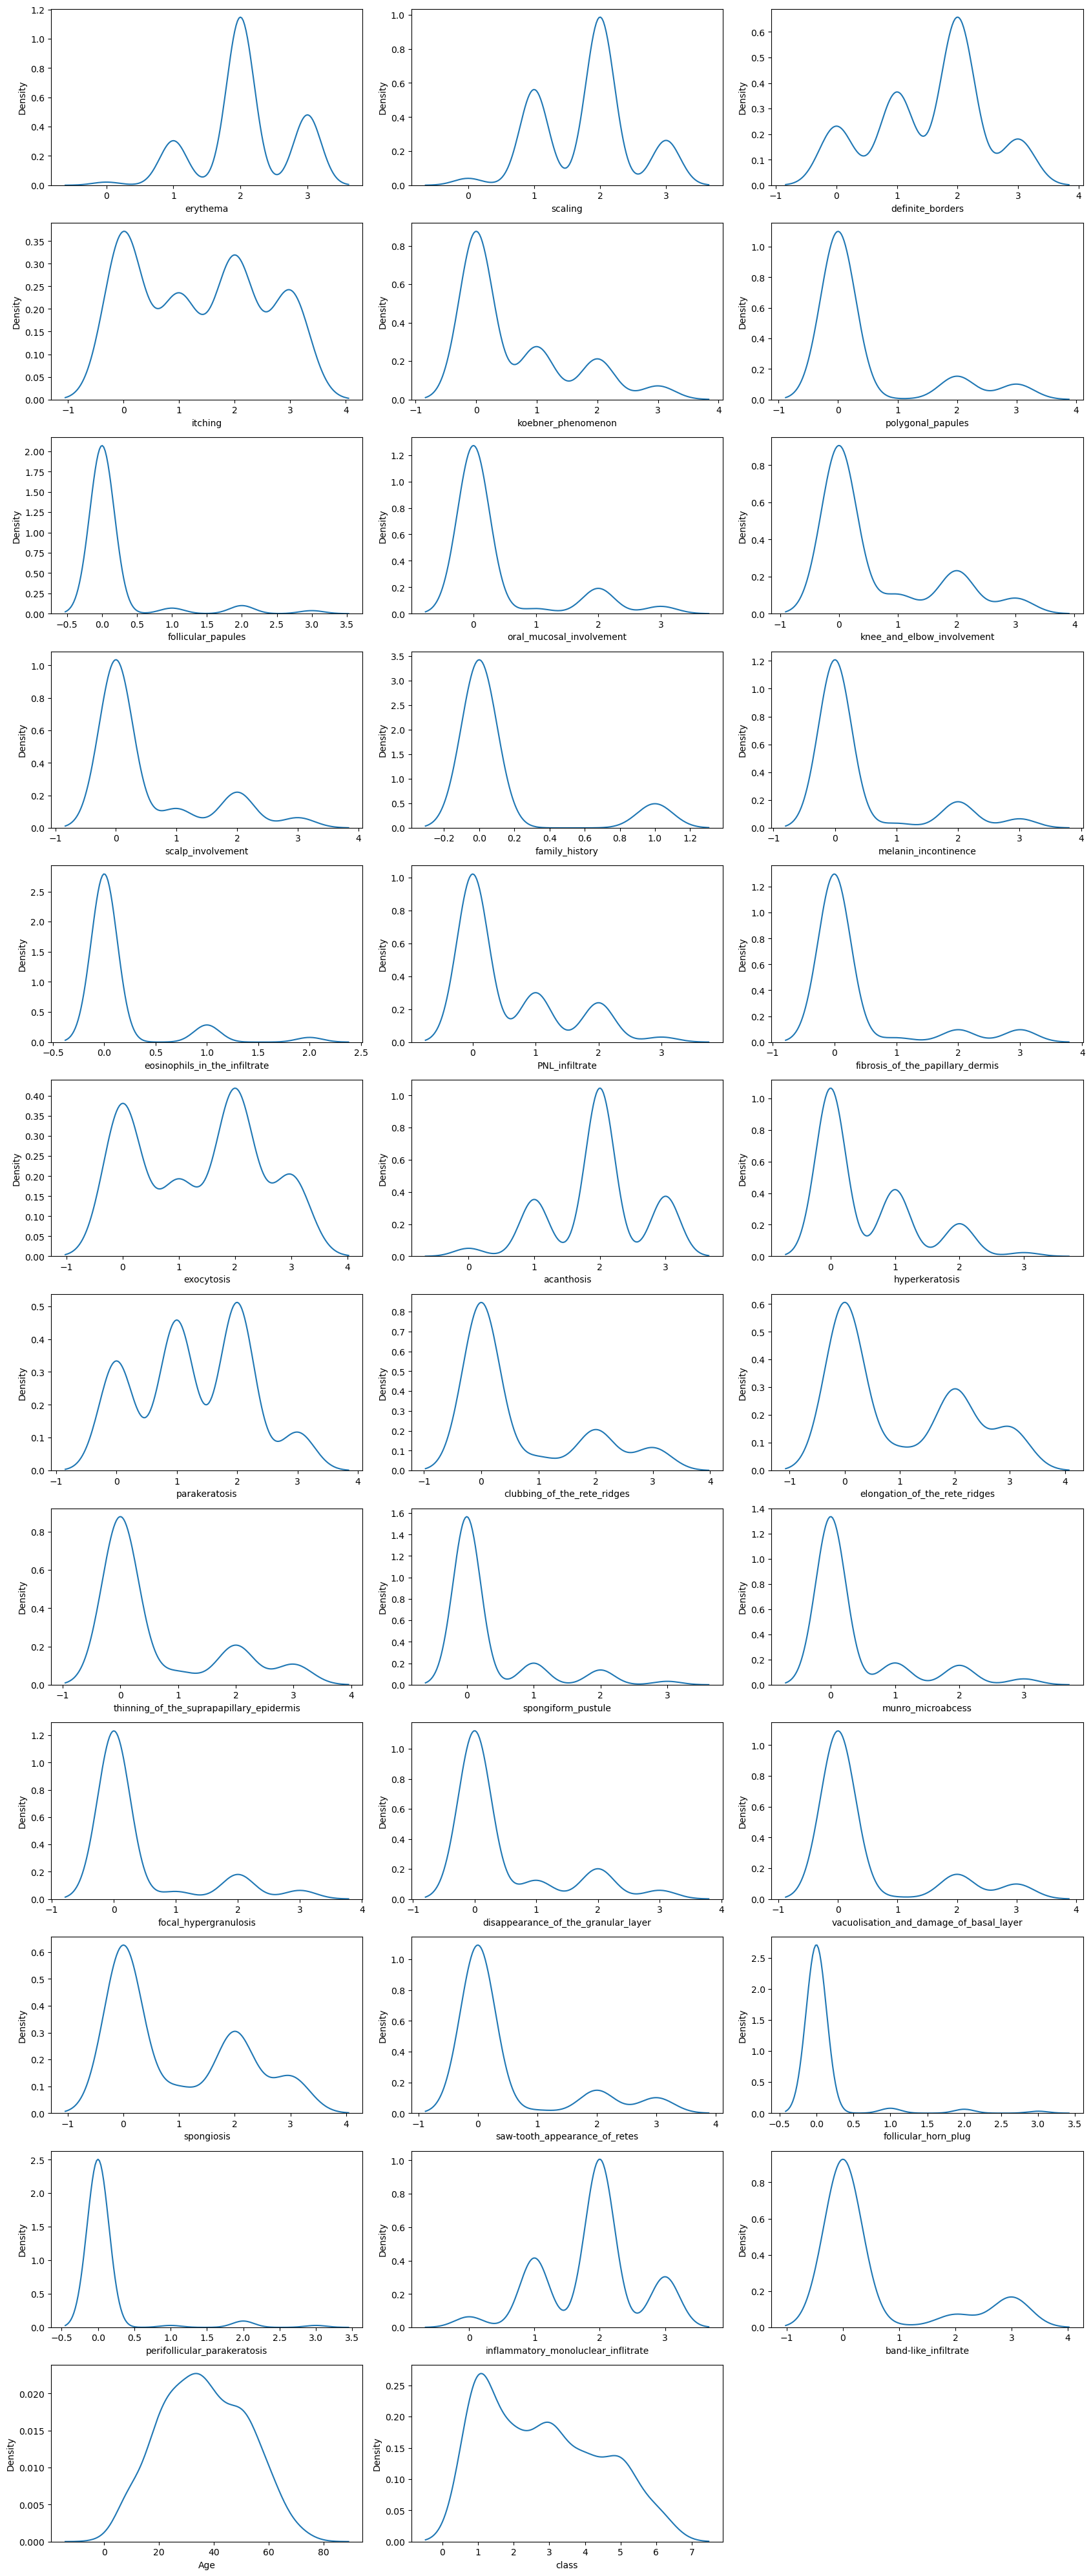

In [ ]:
# Density plot of features
plt.figure(figsize=(17,40))
plotnumber=1
for i in data_eda.columns:
    plt.subplot(12,3,plotnumber)
    sns.kdeplot(df[i])
    plotnumber += 1
plt.tight_layout()

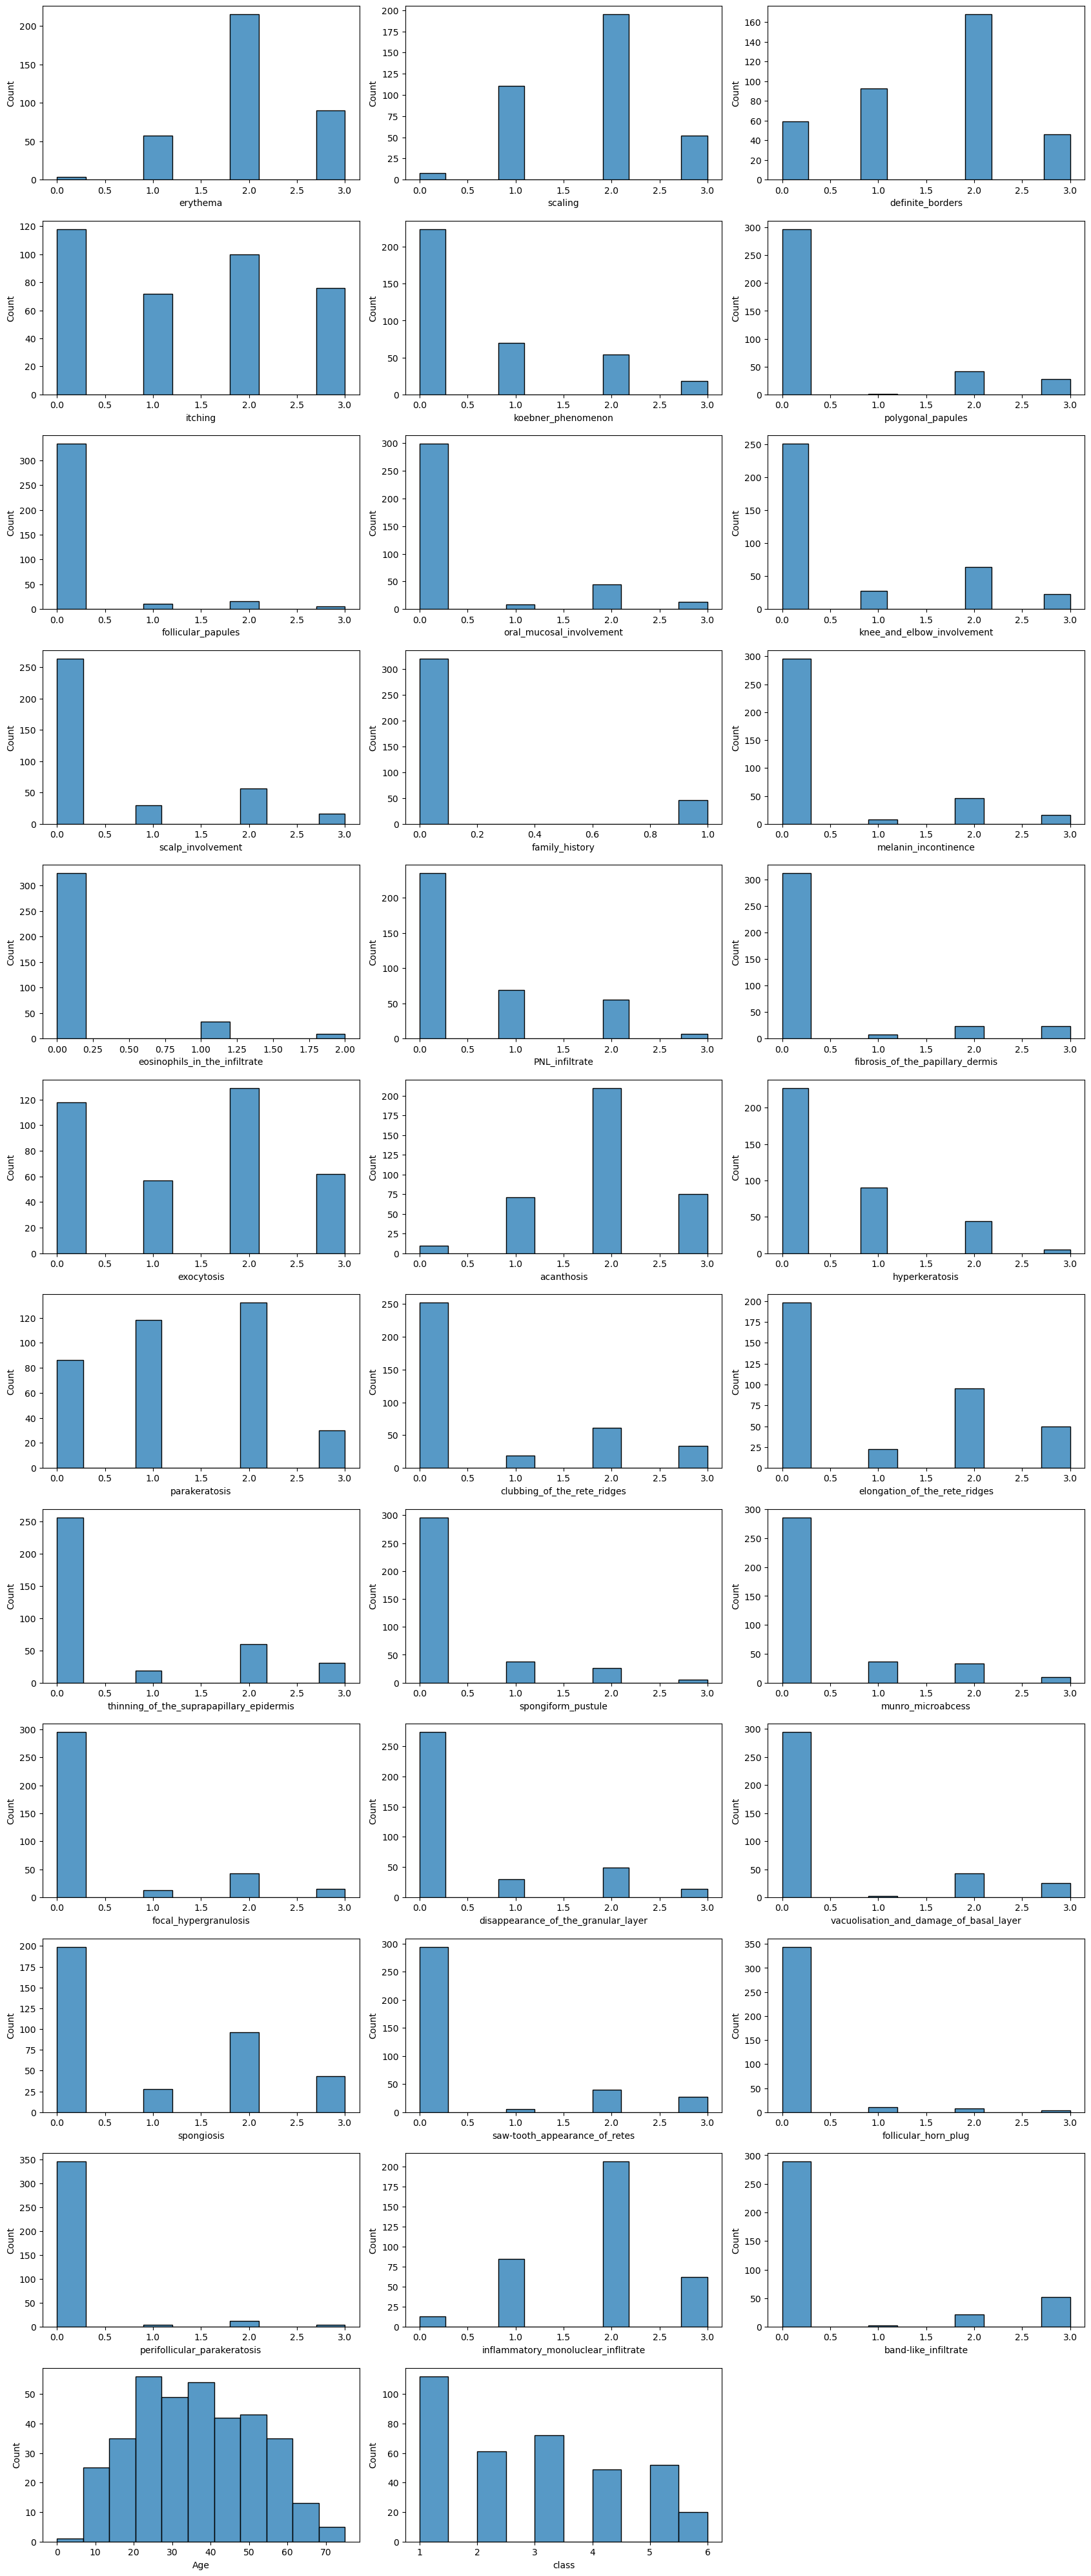

In [ ]:
# Histogram of features
plt.figure(figsize=(17,40))
plotnumber=1
for i in data_eda.columns:
    plt.subplot(12,3,plotnumber)
    sns.histplot(df[i])
    plotnumber += 1
plt.tight_layout()

<AxesSubplot:xlabel='Age', ylabel='Density'>

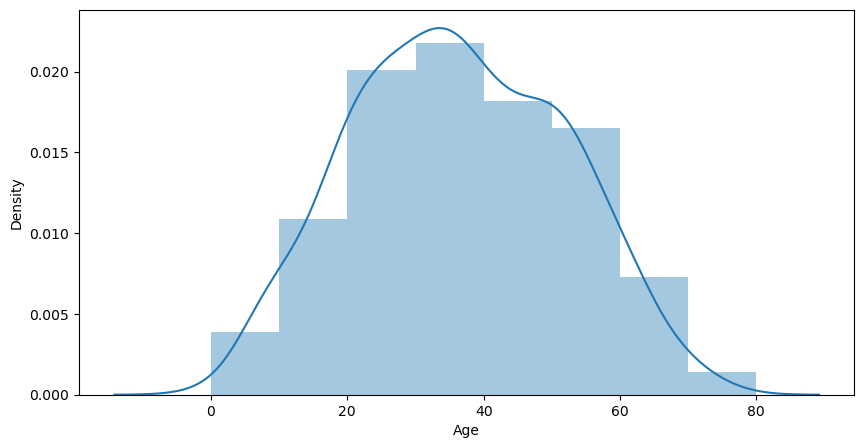

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(data_eda['Age'],bins=[0,10,20,30,40,50,60,70,80])

The Age distribution seems to have moderate Normal distribution And half of the patients are of age 20 to 50

#### Count of Patients having and not having skin disease history :-

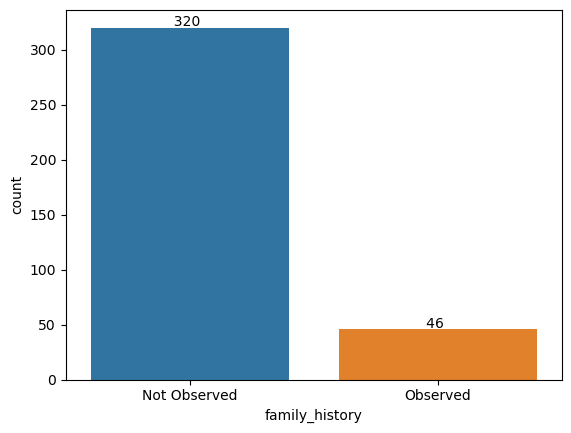

In [ ]:
ax = sns.countplot(data_eda['family_history'])
for p in ax.patches:
    ax.annotate('{:5.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1.0))

Most of the are patient had no skin disease history

#### Count of Patients with different skin disease

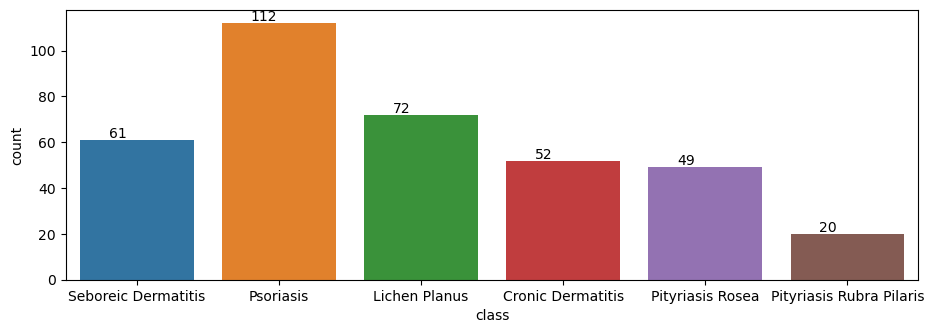

In [ ]:
plt.figure(figsize=(11,3.5))
ax = sns.countplot(data_eda['class'])
for p in ax.patches:
    ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1.0))

#### Percentage wise distribution of different disease

<AxesSubplot:ylabel='class'>

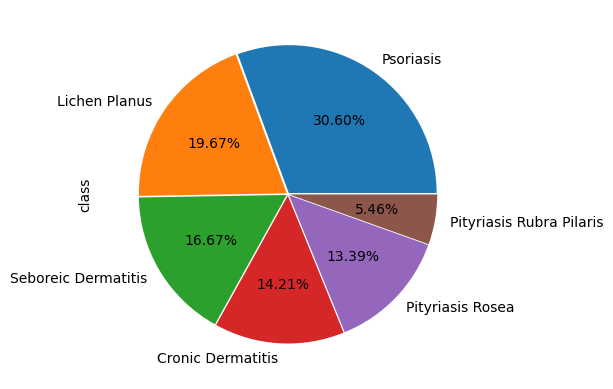

In [ ]:
data_eda['class'].value_counts().plot(kind='pie', autopct='%1.02f%%', radius=1.0, pctdistance=0.6,explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01))

In [ ]:
# DataFrame for clinical features
data_clinical = df[['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement']]

In [ ]:
# DataFrame for Histopathologicalfeatures
data_Histopathology = df[['melanin_incontinence', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate']]

In [ ]:
df['erythema'].value_counts()

2    215
3     90
1     57
0      4
Name: erythema, dtype: int64

#### Percentage wise distribution of each category of all clinical columns

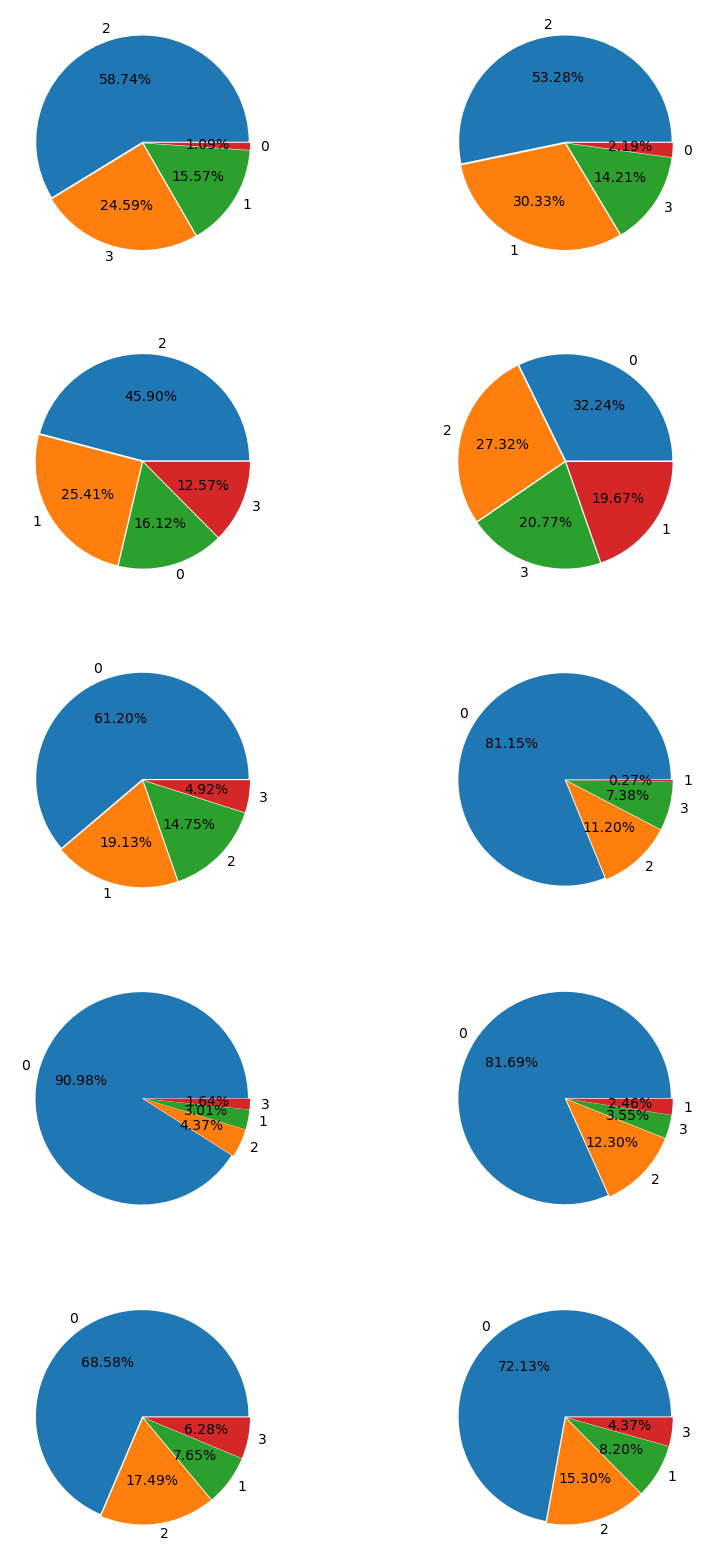

<Figure size 640x480 with 0 Axes>

In [ ]:
# Density plot of features
plt.figure(figsize=(10,20))
plotnumber=1
for i in data_clinical.columns:
    plt.subplot(5,2,plotnumber)
    plt.pie(data_eda[i].value_counts(), labels=data_eda[i].value_counts().index,autopct='%1.2f%%', explode = (0.01, 0.01, 0.01, 0.01))
    plotnumber += 1
plt.show()
plt.tight_layout()

#### Percentage wise distribution of each category of all Histopathological columns

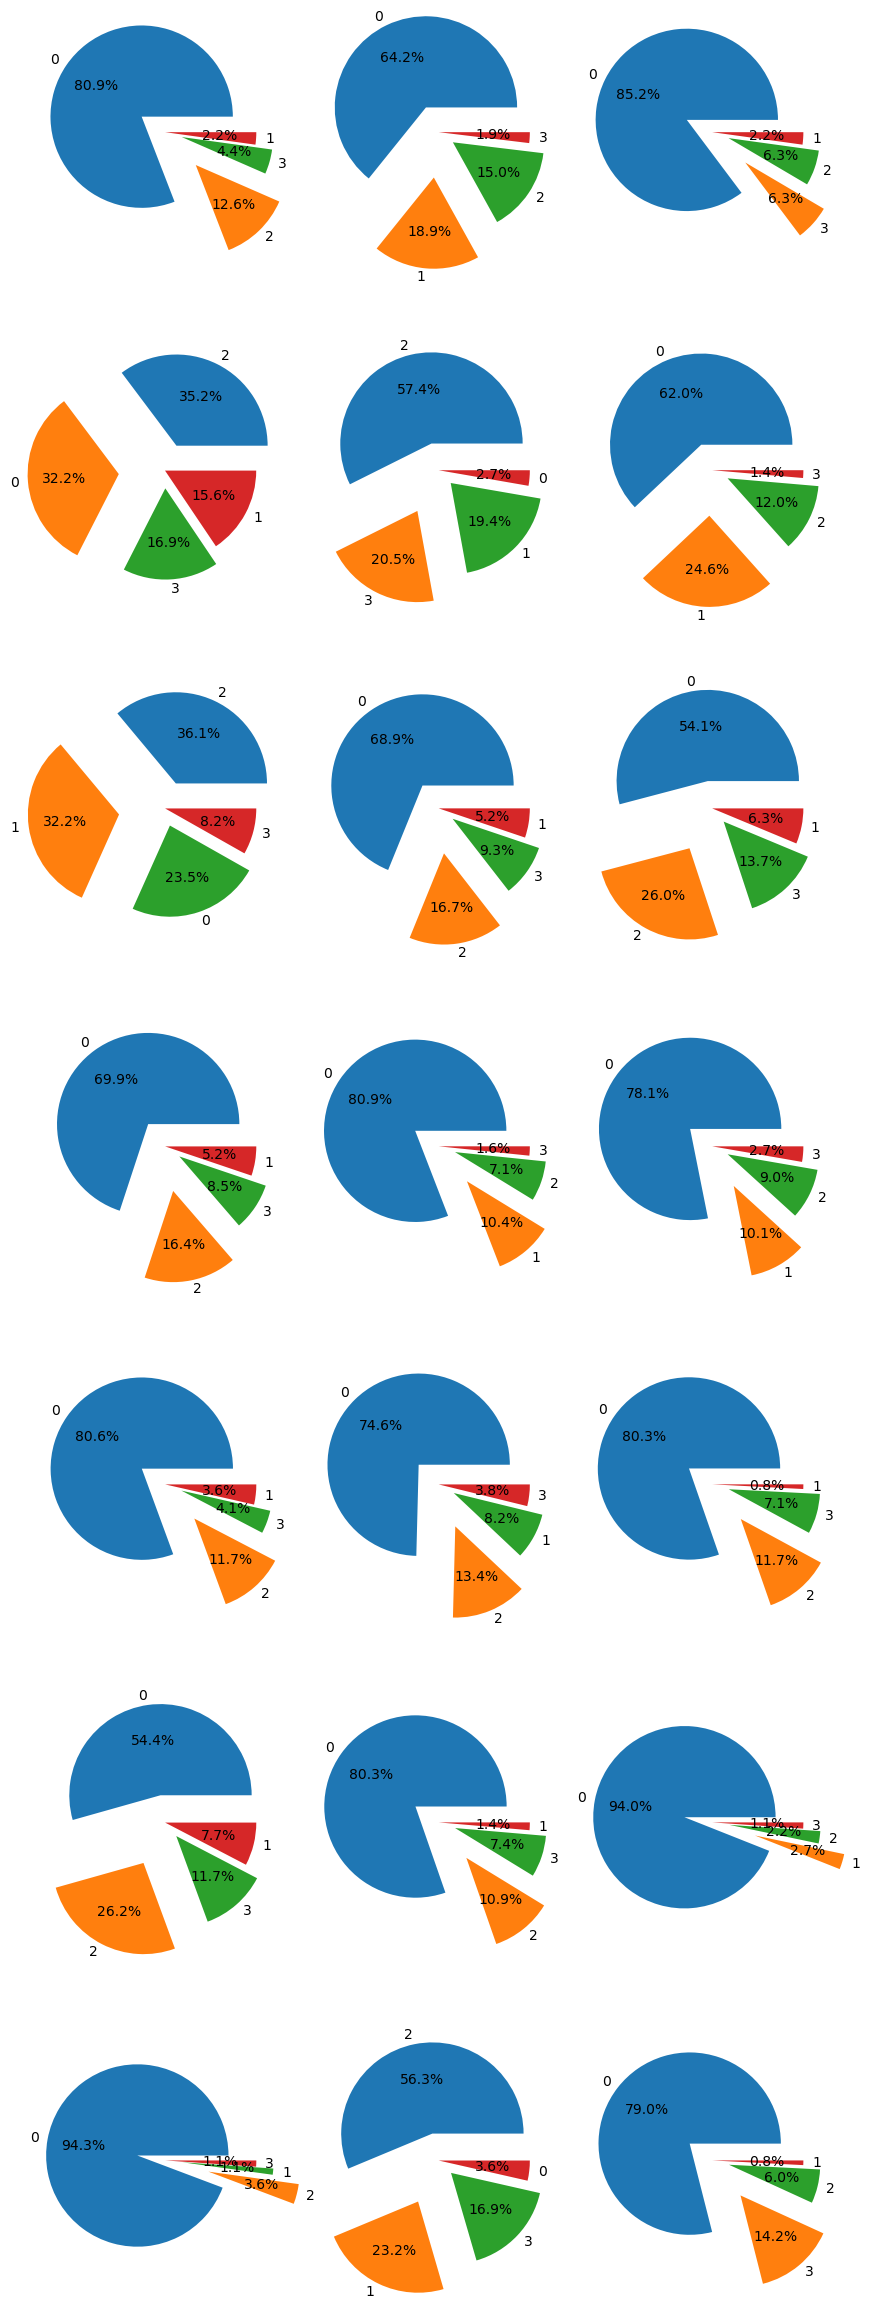

<Figure size 640x480 with 0 Axes>

In [ ]:
# Density plot of features
plt.figure(figsize=(10,30))
plotnumber=1
for i in data_Histopathology.columns:
    plt.subplot(7,3,plotnumber)
    plt.pie(data_Histopathology[i].value_counts(), labels=data_Histopathology[i].value_counts().index,autopct='%1.1f%%', explode = (0.3, 0.5, 0.2, 0.01))
    plotnumber += 1
plt.show()
plt.tight_layout()


### Distribution of diseases classess in Pateints with respect to their Family History of diseases

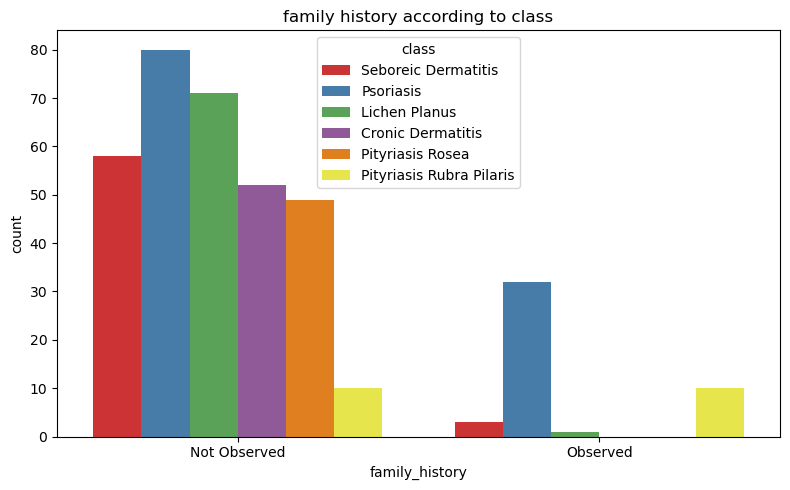

In [ ]:
plt.subplots(figsize = (8, 5))
sns.countplot(x = 'family_history', hue = 'class', data = data_eda, palette = 'Set1')
plt.title('family history according to class')

plt.tight_layout()

### Count Of Patients having(different level) or Not having Scalp Involvement Symptoms

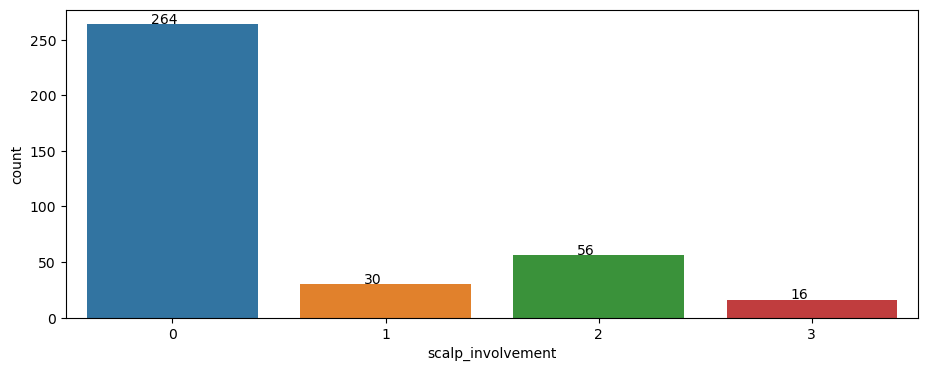

In [ ]:
plt.figure(figsize=(11,4))
ax = sns.countplot(data_eda['scalp_involvement'])
for p in ax.patches:
    ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1.0))

Most of Patients have not scalp_involvement symptoms

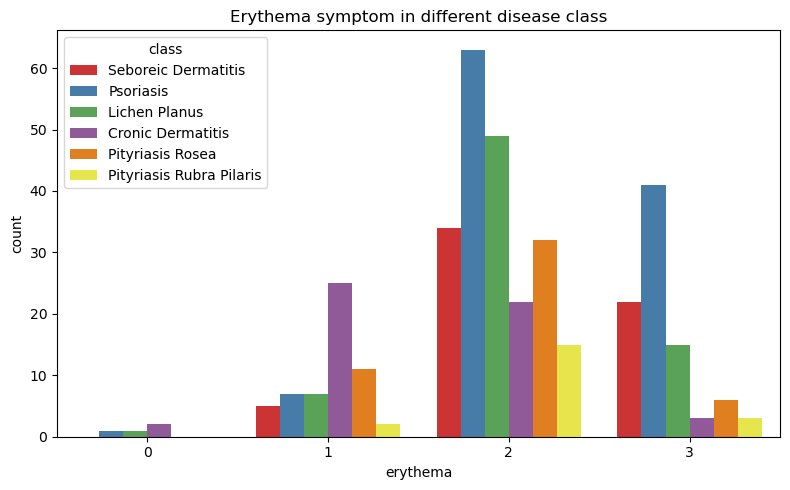

In [11]:
plt.subplots(figsize = (8, 5))
sns.countplot(x = 'erythema', hue = 'class', data = data_eda, palette = 'Set1')
plt.title('Erythema symptom in different disease class')
plt.tight_layout()

No erthema symptoms found in skin disease like Seboreic Dermatitis,Pityriasis Rosea, and Pityriasis Rubra Pilaris.
Patients having erthema symptoms in advance and severe amount are prone to have Psoriasis disease

<Figure size 1600x500 with 0 Axes>

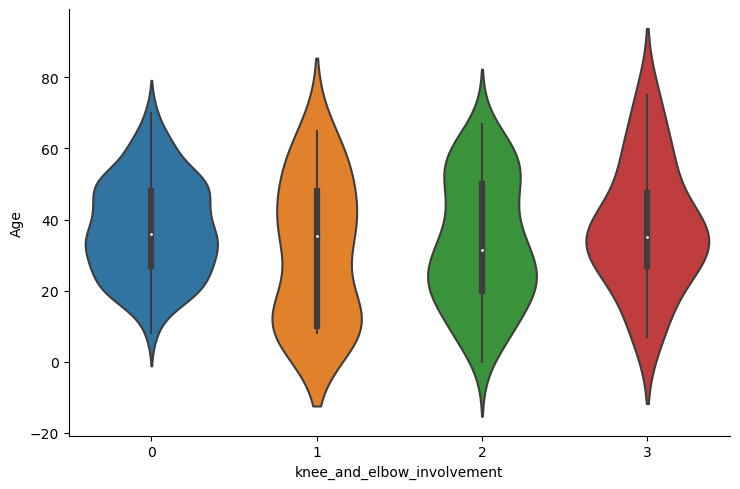

In [ ]:
# knee_and_elbow_involvement of Patients of different Ages
plt.figure(figsize=(16,5))
sns.factorplot(x="knee_and_elbow_involvement",y="Age",data=data_eda,kind='violin',size=5,aspect=1.5)
plt.show()

Patients of age between 7-75 are having large amount of skin complexities on knee and elbow

### Distribution of disease's classess in Pateints with respect to Acanthosis symptom

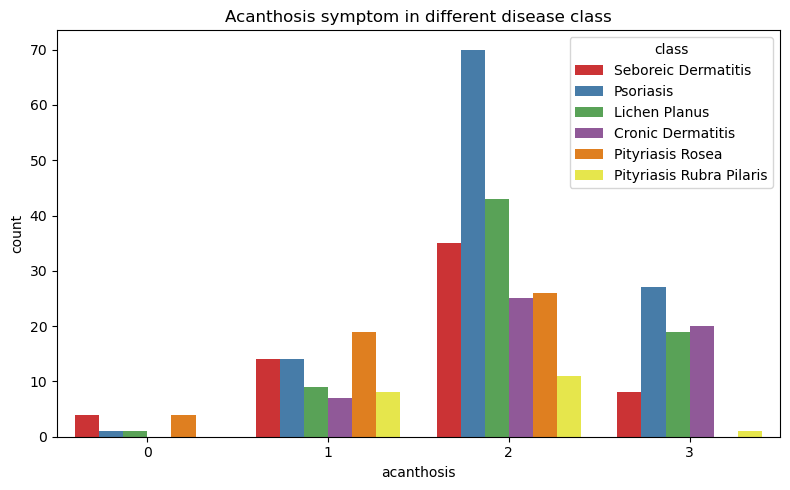

In [12]:
plt.subplots(figsize = (8, 5))
sns.countplot(x = 'acanthosis', hue = 'class', data = data_eda, palette = 'Set1')
plt.title('Acanthosis symptom in different disease class')
plt.tight_layout()

Patients having no Acanthosis(A skin condition that causes a dark discoloration in body folds and creases)symptoms are less prone of getting cronic Dermatitis and Pityriasis Rubra Pilaris disease.And Patients with large amount of Acanthosis symptoms are prone to have all skin disease except than Pityriaisis Rosea disease.

### Distribution of disease's classess in Pateints with respect to Exocytosis symptom

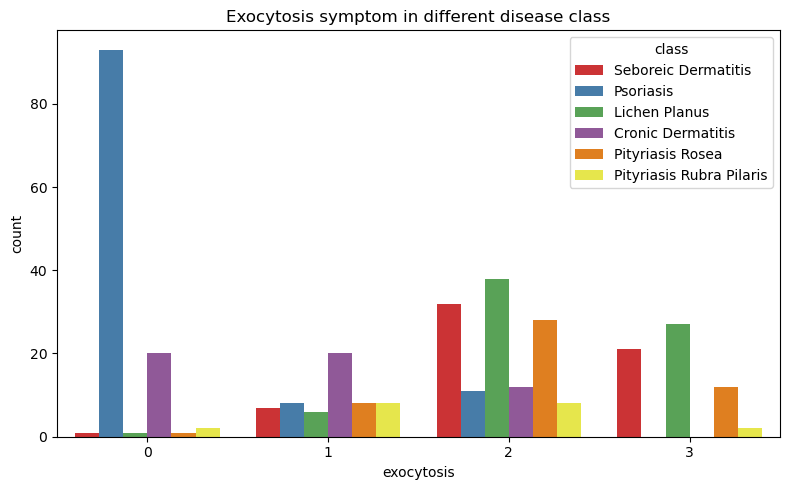

In [13]:
plt.subplots(figsize = (8, 5))
sns.countplot(x = 'exocytosis', hue = 'class', data = data_eda, palette = 'Set1')
plt.title('Exocytosis symptom in different disease class')

plt.tight_layout()

### Distribution of disease's classess in Pateints with respect to parakeratosis symptom

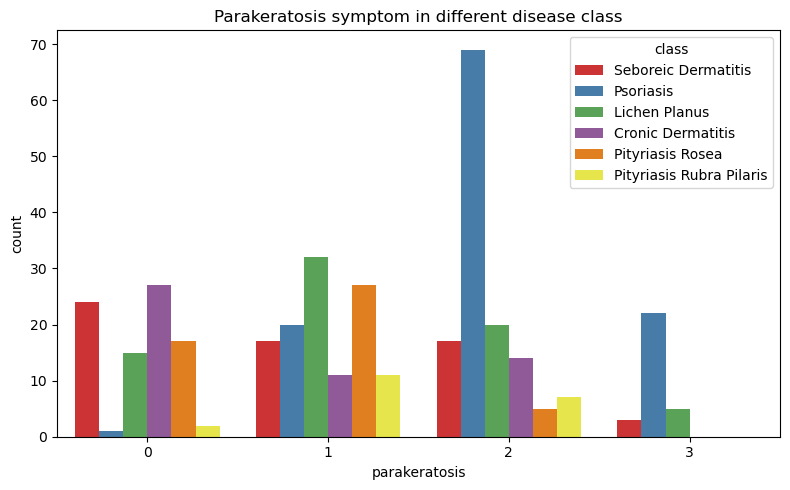

In [14]:
plt.subplots(figsize = (8, 5))
sns.countplot(x = 'parakeratosis', hue = 'class', data = data_eda, palette = 'Set1')
plt.title('Parakeratosis symptom in different disease class')
plt.tight_layout()

Parakeratosis(Incomplete maturation of epidermal keratinocytes) occurs many in skin dieases but particularly in Psoriasis followed by Lichen Planus and Seboreic Dermatisis.

### Distribution of disease's classess in Pateints with respect to polygonal_papules symptom

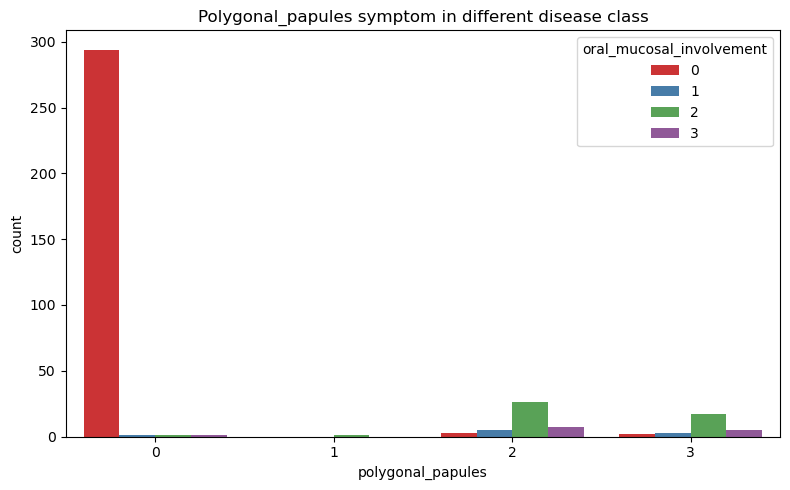

In [15]:
plt.subplots(figsize = (8, 5))
sns.countplot(x = 'polygonal_papules', hue = 'oral_mucosal_involvement', data = data_eda, palette = 'Set1')
plt.title('Polygonal_papules symptom in different disease class')
plt.tight_layout()

Most of the Patients are not having any symptoms like poplygonal_papules and oral_mucosal_involvement simultaneously. Less count of patients for both the symptoms in sever form.

### Distribution of disease's classess in Pateints with respect to munro_microabcess symptom

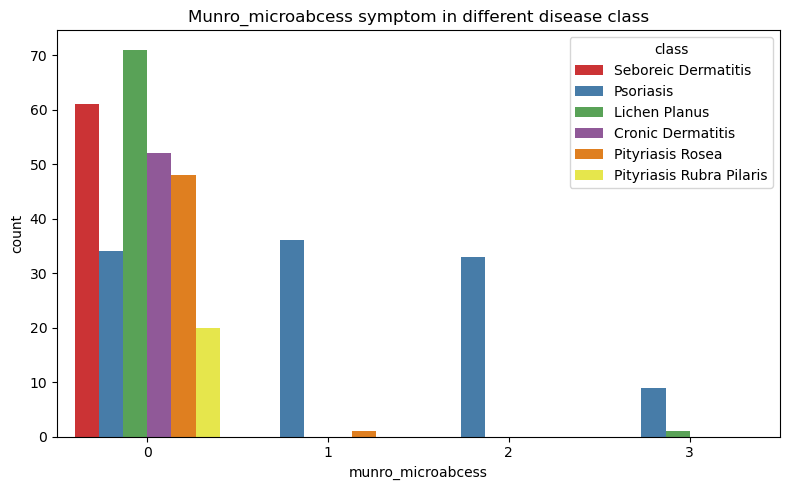

In [16]:
plt.subplots(figsize = (8, 5))
sns.countplot(x = 'munro_microabcess', hue = 'class', data = data_eda, palette = 'Set1')
plt.title('Munro_microabcess symptom in different disease class')
plt.tight_layout()

Munro's microabscess is an abscess (collection of neutrophils) in the stratum corneum of the epidermis due to the infiltration of neutrophils from papillary dermis into the epidermal stratum corneum. It is not a symptom of Seaboreic Dermatitis,Cronic Dermatisis and Pityriasis Rubra Pilaris but could be a symtom of Psoriasis and Pityriasis Rosea if patient are having munro_microbacess symptom in intermediate amount.They are a cardinal sign of Psoriasis.

### Distribution of disease's classess in Pateints with respect to perifollicular_parakeratosis symptom

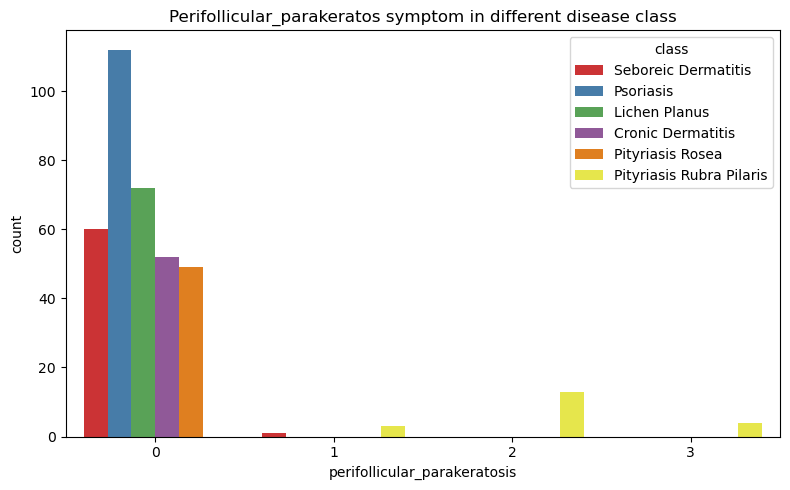

In [17]:
plt.subplots(figsize = (8, 5))
sns.countplot(x = 'perifollicular_parakeratosis', hue = 'class', data = data_eda, palette = 'Set1')
plt.title('Perifollicular_parakeratos symptom in different disease class')
plt.tight_layout()

Perifollicular_parakertosis  is particularly occurs in Pityriasis Rubra Pilaris skin disease.

In [18]:
# Dataset for EDA of 
df1 = data_eda.copy()

Text(0.5, 0.98, 'Age vs. different diseases')

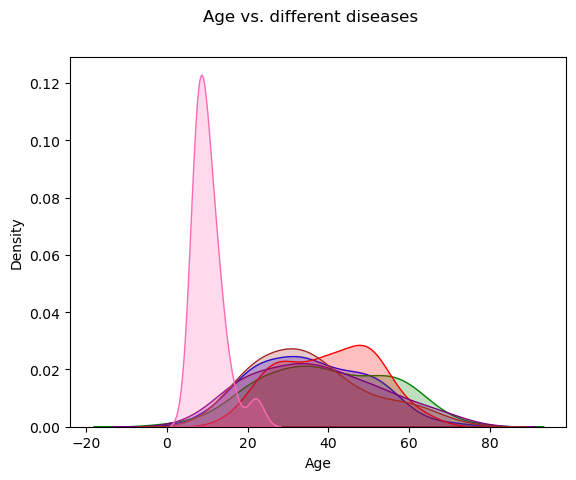

In [19]:
# Desnity plot of Ages with respect to different Skin deseases
fig, ax = plt.subplots()

sns.kdeplot(df1[df1["class"]=='Seboreic Dermatitis']["Age"], shade=True, color="blue", label="Seboreic Dermatitis", ax=ax)
sns.kdeplot(df1[df1["class"]=='Psoriasis']["Age"], shade=True, color="green", label="Psoriasis", ax=ax)
sns.kdeplot(df1[df1["class"]=='Lichen Planus']["Age"], shade=True, color="red", label="Lichen Planus", ax=ax)
sns.kdeplot(df1[df1["class"]=='Cronic Dermatitis']["Age"], shade=True, color="purple", label="Cronic Dermatitis", ax=ax)
sns.kdeplot(df1[df1["class"]=='Pityriasis Rosea']["Age"], shade=True, color="brown", label="Pityriasis Rosea", ax=ax)
sns.kdeplot(df1[df1["class"]=='Pityriasis Rubra Pilaris']["Age"], shade=True, color="hotpink", label="Pityriasis Rubra Pilaris", ax=ax)
ax.set_xlabel("Age")
ax.set_ylabel("Density")
fig.suptitle("Age vs. different diseases")

Except Pityriasis Rubra Pilaris skin disease(in range of age between 0-28), all disease are spread over all age groups.

### Distribution of disease's classess in Pateints with respect to PNL_infiltrate symptom

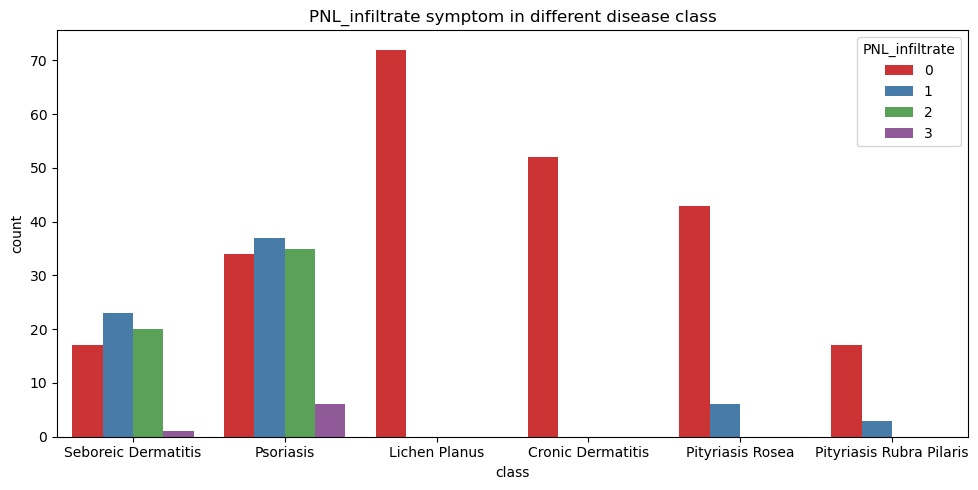

In [20]:
plt.subplots(figsize = (10, 5))
sns.countplot(x = 'class', hue = 'PNL_infiltrate', data = data_eda, palette = 'Set1')
plt.title('PNL_infiltrate symptom in different disease class')
plt.tight_layout()

### Data Preprocessing 

#### 1) Data Cleaning

In [21]:
# dataset for Modeling
df1 = df.copy()

In [ ]:
df1['class'].value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

In [ ]:
df1['Age'].unique()

array([55.,  8., 26., 40., 45., 41., 18., 57., 22., 30., 20., 21., 10.,
       65., 38., 23., 17., 51., 42., 44., 33., 43., 50., 34., nan, 15.,
       46., 62., 35., 48., 12., 52., 60., 32., 19., 29., 25., 36., 13.,
       27., 31., 28., 64., 39., 47., 16.,  0.,  7., 70., 37., 61., 67.,
       56., 53., 24., 58., 49., 63., 68.,  9., 75.])

Since by viewing the dataset we found that column Age is having rows value of '0' and '?'. So we can replace these rows with some central tendency Measurement values.

In [ ]:
# Replacing ? with median value 
df1['Age'].fillna(df1['Age'].median(),inplace=True)

In [ ]:
# Replacing 0 with median value 
df1.loc[df['Age']==0.0,'Age'] = df1['Age'].median()

In [ ]:
df1['Age'].unique()

array([55.,  8., 26., 40., 45., 41., 18., 57., 22., 30., 20., 21., 10.,
       65., 38., 23., 17., 51., 42., 44., 33., 43., 50., 34., 35., 15.,
       46., 62., 48., 12., 52., 60., 32., 19., 29., 25., 36., 13., 27.,
       31., 28., 64., 39., 47., 16.,  7., 70., 37., 61., 67., 56., 53.,
       24., 58., 49., 63., 68.,  9., 75.])

In [ ]:
df1.loc[df1['Age']==0.0]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

#### 2) Duplicasy check

In [ ]:
df1.duplicated().sum()

0

### Feature Engineering

<AxesSubplot:>

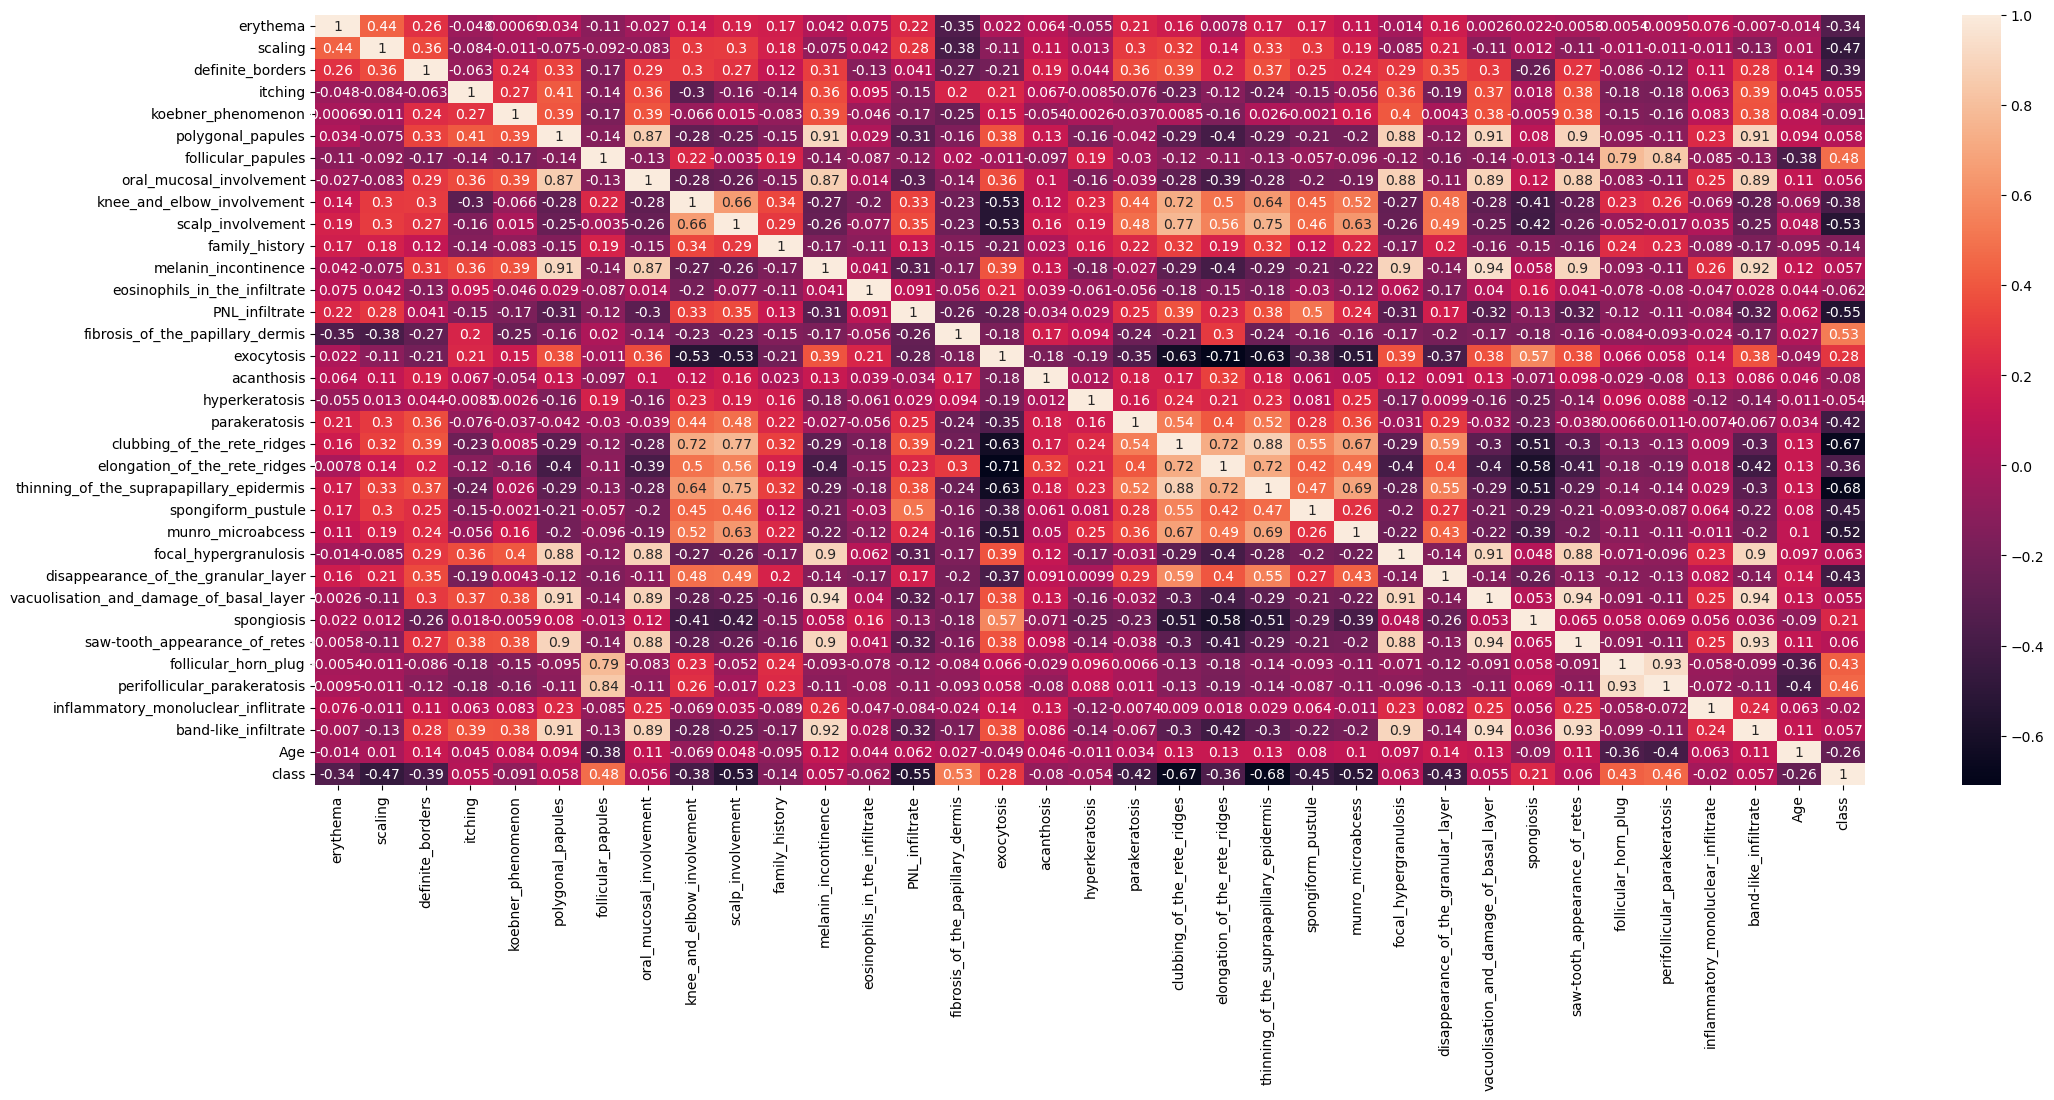

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(df1.corr(),annot=True)

In [ ]:
# Finding the correlation between two features

cor_matrix = df1.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


# List of all columns that shows correlation greater than 0.92

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.92)]
print(to_drop) 

['vacuolisation_and_damage_of_basal_layer', 'saw-tooth_appearance_of_retes', 'perifollicular_parakeratosis', 'band-like_infiltrate']


In [ ]:
df1.drop(['vacuolisation_and_damage_of_basal_layer', 'saw-tooth_appearance_of_retes', 
          'perifollicular_parakeratosis', 'band-like_infiltrate'], axis=1, inplace=True)

In [ ]:
df1.shape

(366, 31)

In [ ]:
# Separating Features and Target Variable
x = df1.drop('class',axis=1)
y = df1['class']

### Scaling Data

In [ ]:
from sklearn.preprocessing import RobustScaler
rc=RobustScaler()
rs_data = rc.fit_transform(x)

In [ ]:
# since scaled_data in an array form so we have to convert it to dataframe for further process
dfof_rs_data = pd.DataFrame(data=rs_data,columns=x.columns)

In [ ]:
# Data Frame of Scaled data
dfof_rs_data.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0       0.0      0.0              -2.0      1.0                 0.0   
1       1.0      1.0               1.0      0.5                 1.0   
2       0.0     -1.0               0.0      1.0                 1.0   
3       0.0      0.0               0.0     -0.5                 0.0   
4       0.0      1.0               0.0      0.5                 2.0   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                0.0                 0.0                       0.0   
1                0.0                 0.0                       0.0   
2                3.0                 0.0                       3.0   
3                0.0                 0.0                       0.0   
4                2.0                 0.0                       2.0   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                         1.0                0.0  ...   
1                         1.0                1.0  ...   
2                         0.0                0.0  ...   
3                         3.0                2.0  ...   
4                         0.0                0.0  ...   

   elongation_of_the_rete_ridges  thinning_of_the_suprapapillary_epidermis  \
0                            0.0                                       0.0   
1                            1.0                                       2.0   
2                            0.0                                       0.0   
3                            1.0                                       2.0   
4                            0.0                                       0.0   

   spongiform_pustule  munro_microabcess  focal_hypergranulosis  \
0                 0.0                0.0                    0.0   
1                 2.0                1.0                    0.0   
2                 0.0                0.0                    2.0   
3                 2.0                0.0                    0.0   
4                 0.0                0.0                    2.0   

   disappearance_of_the_granular_layer  spongiosis  follicular_horn_plug  \
0                                  0.0         1.5                   0.0   
1                                  0.0         0.0                   0.0   
2                                  0.0         1.5                   0.0   
3                                  3.0         0.0                   0.0   
4                                  2.0         1.0                   0.0   

   inflammatory_monoluclear_inflitrate       Age  
0                                 -1.0  0.869565  
1                                 -1.0 -1.173913  
2                                  0.0 -0.391304  
3                                  1.0  0.217391  
4                                  0.0  0.434783  

[5 rows x 30 columns]

### Label Encoding

In [ ]:
y.value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

In [ ]:
# Label Encoding of target Variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
y = pd.DataFrame(data=y_encoded)

In [ ]:
y.value_counts()

0    112
2     72
1     61
4     52
3     49
5     20
dtype: int64

In [ ]:
x =dfof_rs_data.copy()

In [ ]:
x.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0       0.0      0.0              -2.0      1.0                 0.0   
1       1.0      1.0               1.0      0.5                 1.0   
2       0.0     -1.0               0.0      1.0                 1.0   
3       0.0      0.0               0.0     -0.5                 0.0   
4       0.0      1.0               0.0      0.5                 2.0   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                0.0                 0.0                       0.0   
1                0.0                 0.0                       0.0   
2                3.0                 0.0                       3.0   
3                0.0                 0.0                       0.0   
4                2.0                 0.0                       2.0   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                         1.0                0.0  ...   
1                         1.0                1.0  ...   
2                         0.0                0.0  ...   
3                         3.0                2.0  ...   
4                         0.0                0.0  ...   

   elongation_of_the_rete_ridges  thinning_of_the_suprapapillary_epidermis  \
0                            0.0                                       0.0   
1                            1.0                                       2.0   
2                            0.0                                       0.0   
3                            1.0                                       2.0   
4                            0.0                                       0.0   

   spongiform_pustule  munro_microabcess  focal_hypergranulosis  \
0                 0.0                0.0                    0.0   
1                 2.0                1.0                    0.0   
2                 0.0                0.0                    2.0   
3                 2.0                0.0                    0.0   
4                 0.0                0.0                    2.0   

   disappearance_of_the_granular_layer  spongiosis  follicular_horn_plug  \
0                                  0.0         1.5                   0.0   
1                                  0.0         0.0                   0.0   
2                                  0.0         1.5                   0.0   
3                                  3.0         0.0                   0.0   
4                                  2.0         1.0                   0.0   

   inflammatory_monoluclear_inflitrate       Age  
0                                 -1.0  0.869565  
1                                 -1.0 -1.173913  
2                                  0.0 -0.391304  
3                                  1.0  0.217391  
4                                  0.0  0.434783  

[5 rows x 30 columns]

### Train and Test split 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfof_rs_data,y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(256, 30)

In [ ]:
X_test.shape

(110, 30)

### Data Imbalancy check

In [ ]:
y_train.value_counts()

0    72
2    53
1    45
4    36
3    34
5    16
dtype: int64

Since Data is imbalance so to balance the data set we use one of the technique called SMOTE 

In [ ]:
# Data balancing using SMOTE 
## Data balancing
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(X_train,y_train)

In [ ]:
x_smote

erythema   scaling  definite_borders   itching  koebner_phenomenon  \
0    0.000000  0.000000         -1.000000  0.000000            0.000000   
1    0.000000  1.000000         -2.000000  1.000000            0.000000   
2    1.000000  1.000000          0.000000  0.500000            0.000000   
3   -1.000000 -1.000000         -2.000000  1.000000            0.000000   
4   -1.000000 -1.000000         -2.000000  1.000000            0.000000   
5    0.000000  0.000000         -1.000000  0.500000            0.000000   
6    1.000000  0.000000         -2.000000  0.500000            0.000000   
7    0.000000 -1.000000          1.000000  1.000000            3.000000   
8   -1.000000  0.000000          0.000000 -0.500000            1.000000   
9   -1.000000  0.000000          0.000000  0.000000            0.000000   
10   1.000000  1.000000          0.000000 -0.500000            0.000000   
11   0.000000  0.000000         -2.000000  0.500000            2.000000   
12   1.000000  0.000000         -2.000000  0.500000            0.000000   
13   0.000000 -1.000000          0.000000  1.000000            2.000000   
14   1.000000  0.000000          0.000000 -0.500000            0.000000   
15   1.000000  0.000000          0.000000 -0.500000            0.000000   
16   0.000000  1.000000          1.000000 -0.500000            0.000000   
17   0.000000  0.000000          1.000000  1.000000            1.000000   
18   0.000000  0.000000          0.000000 -0.500000            0.000000   
19   1.000000  0.000000          1.000000 -0.500000            0.000000   
20   1.000000  1.000000          1.000000 -0.500000            0.000000   
21   1.000000  1.000000         -2.000000  1.000000            0.000000   
22   0.000000  0.000000          0.000000  1.000000            2.000000   
23   0.000000  0.000000          1.000000  1.000000            1.000000   
24   0.000000 -1.000000         -2.000000  0.500000            0.000000   
25   0.000000  0.000000          0.000000 -0.500000            1.000000   
26   1.000000 -1.000000          0.000000  1.000000            0.000000   
27   1.000000  1.000000          0.000000  0.000000            1.000000   
28   0.000000  0.000000          0.000000 -0.500000            2.000000   
29   0.000000  1.000000         -1.000000  0.500000            0.000000   
30   1.000000  0.000000          0.000000  0.500000            0.000000   
31   0.000000  1.000000          0.000000 -0.500000            0.000000   
32   0.000000  1.000000          0.000000 -0.500000            0.000000   
33  -1.000000  1.000000         -1.000000 -0.500000            0.000000   
34   0.000000 -1.000000          0.000000  0.500000            0.000000   
35   0.000000  0.000000          0.000000 -0.500000            0.000000   
36   0.000000  0.000000          1.000000  1.000000            1.000000   
37   1.000000  0.000000         -1.000000 -0.500000            0.000000   
38  -1.000000 -1.000000         -1.000000  1.000000            0.000000   
39   1.000000  1.000000          1.000000 -0.500000            1.000000   
40   1.000000  1.000000          1.000000 -0.500000            0.000000   
41   0.000000  0.000000         -1.000000  0.500000            0.000000   
42   0.000000 -1.000000         -1.000000  1.000000            2.000000   
43   1.000000  0.000000          0.000000  0.000000            0.000000   
44  -1.000000 -1.000000         -1.000000 -0.500000            0.000000   
45   0.000000  0.000000         -1.000000  1.000000            0.000000   
46   1.000000  1.000000          1.000000  0.500000            0.000000   
47   0.000000  0.000000          0.000000  1.000000            2.000000   
48   0.000000 -1.000000         -1.000000  0.000000            0.000000   
49  -1.000000 -1.000000          0.000000  1.000000            2.000000   
50  -1.000000 -1.000000          0.000000 -0.500000            0.000000   
51  -1.000000 -1.000000         -2.000000  0.000000            3.000000   
52   0.000000  0.000000       

In [ ]:
y_smote

0
0    5
1    1
2    2
3    4
4    4
5    4
6    1
7    2
8    3
9    1
10   0
11   3
12   1
13   2
14   1
15   0
16   0
17   2
18   0
19   0
20   0
21   1
22   2
23   2
24   4
25   0
26   2
27   0
28   3
29   1
30   1
31   0
32   0
33   0
34   4
35   0
36   2
37   1
38   4
39   0
40   0
41   1
42   2
43   1
44   4
45   4
46   4
47   2
48   1
49   2
50   5
51   3
52   5
53   2
54   0
55   3
56   1
57   1
58   2
59   0
60   5
61   1
62   0
63   0
64   1
65   1
66   2
67   3
68   3
69   3
70   2
71   1
72   5
73   0
74   4
75   2
76   0
77   4
78   2
79   4
80   0
81   2
82   3
83   1
84   3
85   2
86   4
87   1
88   0
89   2
90   4
91   0
92   2
93   2
94   1
95   3
96   0
97   0
98   2
99   3
100  4
101  2
102  1
103  3
104  0
105  2
106  4
107  4
108  5
109  5
110  4
111  0
112  2
113  0
114  0
115  1
116  1
117  1
118  1
119  1
120  1
121  2
122  0
123  5
124  1
125  4
126  3
127  0
128  0
129  3
130  0
131  3
132  2
133  2
134  4
135  0
136  3
137  3
138  1
139  0
140  3
141  5
142  0
143  0
144  0
145  0
146  2
147  3
148  2
149  1
150  4
151  4
152  2
153  0
154  0
155  2
156  0
157  5
158  0
159  5
160  4
161  3
162  4
163  1
164  1
165  3
166  2
167  0
168  2
169  4
170  0
171  4
172  3
173  1
174  2
175  1
176  1
177  0
178  4
179  2
180  3
181  2
182  0
183  0
184  2
185  4
186  4
187  2
188  0
189  4
190  3
191  4
192  1
193  1
194  2
195  2
196  3
197  0
198  0
199  0
200  2
201  0
202  0
203  3
204  4
205  1
206  0
207  4
208  0
209  0
210  2
211  0
212  0
213  0
214  1
215  4
216  3
217  0
218  0
219  0
220  4
221  2
222  2
223  0
224  2
225  1
226  2
227  3
228  1
229  0
230  2
231  1
232  2
233  3
234  0
235  2
236  0
237  5
238  3
239  3
240  1
241  0
242  0
243  5
244  2
245  0
246  2
247  4
248  0
249  5
250  1
251  5
252  3
253  3
254  5
255  0
256  1
257  1
258  1
259  1
260  1
261  1
262  1
263  1
264  1
265  1
266  1
267  1
268  1
269  1
270  1
271  1
272  1
273  1
274  1
275  1
276  1
277  1
278  1
279  1
280  1
281  1
282  1
283  2
284  2
285  2
286  2
287  2
288  2
289  2
290  2
291  2
292  2
293  2
294  2
295  2
296  2
297  2
298  2
299  2
300  2
301  2
302  3
303  3
304  3
305  3
306  3
307  3
308  3
309  3
310  3
311  3
312  3
313  3
314  3
315  3
316  3
317  3
318  3
319  3
320  3
321  3
322  3
323  3
324  3
325  3
326  3
327  3
328  3
329  3
330  3
331  3
332  3
333  3
334  3
335  3
336  3
337  3
338  3
339  3
340  4
341  4
342  4
343  4
344  4
345  4
346  4
347  4
348  4
349  4
350  4
351  4
352  4
353  4
354  4
355  4
356  4
357  4
358  4
359  4
360  4
361  4
362  4
363  4
364  4
365  4
366  4
367  4
368  4
369  4
370  4
371  4
372  4
373  4
374  4
375  4
376  5
377  5
378  5
379  5
380  5
381  5
382  5
383  5
384  5
385  5
386  5
387  5
388  5
389  5
390  5
391  5
392  5
393  5
394  5
395  5
396  5
397  5
398  5
399  5
400  5
401  5
402  5
403  5
404  5
405  5
406  5
407  5
408  5
409  5
410  5
411  5
412  5
413  5
414  5
415  5
416  5
417  5
418  5
419  5
420  5
421  5
422  5
423  5
424  5
425  5
426  5
427  5
428  5
429  5
430  5
431  5

In [ ]:
# copying smoted data 
X_train = x_smote.copy()

In [ ]:
y_train = y_smote.copy()

In [ ]:
X_train

erythema   scaling  definite_borders   itching  koebner_phenomenon  \
0    0.000000  0.000000         -1.000000  0.000000            0.000000   
1    0.000000  1.000000         -2.000000  1.000000            0.000000   
2    1.000000  1.000000          0.000000  0.500000            0.000000   
3   -1.000000 -1.000000         -2.000000  1.000000            0.000000   
4   -1.000000 -1.000000         -2.000000  1.000000            0.000000   
5    0.000000  0.000000         -1.000000  0.500000            0.000000   
6    1.000000  0.000000         -2.000000  0.500000            0.000000   
7    0.000000 -1.000000          1.000000  1.000000            3.000000   
8   -1.000000  0.000000          0.000000 -0.500000            1.000000   
9   -1.000000  0.000000          0.000000  0.000000            0.000000   
10   1.000000  1.000000          0.000000 -0.500000            0.000000   
11   0.000000  0.000000         -2.000000  0.500000            2.000000   
12   1.000000  0.000000         -2.000000  0.500000            0.000000   
13   0.000000 -1.000000          0.000000  1.000000            2.000000   
14   1.000000  0.000000          0.000000 -0.500000            0.000000   
15   1.000000  0.000000          0.000000 -0.500000            0.000000   
16   0.000000  1.000000          1.000000 -0.500000            0.000000   
17   0.000000  0.000000          1.000000  1.000000            1.000000   
18   0.000000  0.000000          0.000000 -0.500000            0.000000   
19   1.000000  0.000000          1.000000 -0.500000            0.000000   
20   1.000000  1.000000          1.000000 -0.500000            0.000000   
21   1.000000  1.000000         -2.000000  1.000000            0.000000   
22   0.000000  0.000000          0.000000  1.000000            2.000000   
23   0.000000  0.000000          1.000000  1.000000            1.000000   
24   0.000000 -1.000000         -2.000000  0.500000            0.000000   
25   0.000000  0.000000          0.000000 -0.500000            1.000000   
26   1.000000 -1.000000          0.000000  1.000000            0.000000   
27   1.000000  1.000000          0.000000  0.000000            1.000000   
28   0.000000  0.000000          0.000000 -0.500000            2.000000   
29   0.000000  1.000000         -1.000000  0.500000            0.000000   
30   1.000000  0.000000          0.000000  0.500000            0.000000   
31   0.000000  1.000000          0.000000 -0.500000            0.000000   
32   0.000000  1.000000          0.000000 -0.500000            0.000000   
33  -1.000000  1.000000         -1.000000 -0.500000            0.000000   
34   0.000000 -1.000000          0.000000  0.500000            0.000000   
35   0.000000  0.000000          0.000000 -0.500000            0.000000   
36   0.000000  0.000000          1.000000  1.000000            1.000000   
37   1.000000  0.000000         -1.000000 -0.500000            0.000000   
38  -1.000000 -1.000000         -1.000000  1.000000            0.000000   
39   1.000000  1.000000          1.000000 -0.500000            1.000000   
40   1.000000  1.000000          1.000000 -0.500000            0.000000   
41   0.000000  0.000000         -1.000000  0.500000            0.000000   
42   0.000000 -1.000000         -1.000000  1.000000            2.000000   
43   1.000000  0.000000          0.000000  0.000000            0.000000   
44  -1.000000 -1.000000         -1.000000 -0.500000            0.000000   
45   0.000000  0.000000         -1.000000  1.000000            0.000000   
46   1.000000  1.000000          1.000000  0.500000            0.000000   
47   0.000000  0.000000          0.000000  1.000000            2.000000   
48   0.000000 -1.000000         -1.000000  0.000000            0.000000   
49  -1.000000 -1.000000          0.000000  1.000000            2.000000   
50  -1.000000 -1.000000          0.000000 -0.500000            0.000000   
51  -1.000000 -1.000000         -2.000000  0.000000            3.000000   
52   0.000000  0.000000       

In [ ]:
y_train.value_counts()

0    72
1    72
2    72
3    72
4    72
5    72
dtype: int64

### Model Implementation

> 1) Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression # model import

In [ ]:
# MODEL EVALUATION
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score,recall_score,f1_score

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
y_train_pred_logR = lr.predict(X_train) # training model 
y_test_pred_logR = lr.predict(X_test) # testing model 

In [ ]:
#Evaluate Logistic Regression model using f1 score:
print("Logistic Regression training set score: %f" % f1_score(y_train, y_train_pred_logR,average='weighted'))
print("Logistic Regression test set score: %f" % f1_score(y_test, y_test_pred_logR,average='weighted'))


Logistic Regression training set score: 0.997685
Logistic Regression test set score: 0.955187


In [ ]:
# Classification Report
print(classification_report(y_test, y_test_pred_logR, target_names=
                            ['Psoriasis','Seboreic_dermatitis','Lichen_planus','Pityriasis_rosea','Cronic_dermatitis',
                             'Pityriasis_rubra_pilaris']))

In [ ]:
logR_cm=confusion_matrix(y_test, y_test_pred_logR)
print('confusion_matrix:')
print(logR_cm)

In [ ]:
# Hyper parameter tuning in Logistic Regression
# Necessary imports
from sklearn.model_selection import GridSearchCV

In [ ]:
log_reg = LogisticRegression(random_state=42)

In [ ]:
# Dictionary of different Hyper Parameter 
params_Log_Reg = {'penalty' : ['l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
                 }
grid = GridSearchCV(log_reg,params_Log_Reg,verbose = 1,cv=3) # cross validation score do multiple calculation for diff diff datsets
# fitting the model for grid search
grid.fit(X_train,y_train)

In [ ]:
# To get best Tuned Parameters value
grid.best_params_

In [ ]:
# Now create a model object with best parameters
logreg_clf1 = LogisticRegression(C=29.763514416313132,max_iter=100,penalty='l2',solver='liblinear')
logreg_clf1.fit(X_train,y_train)

LogisticRegression(C=29.763514416313132, solver='liblinear')

In [ ]:
y_train_pred_logreg1=logreg_clf1.predict(X_train)
y_test_pred_logreg1=logreg_clf1.predict(X_test)

In [ ]:
#Evaluate Logistic Regression model:
print("Logistic Regression hyper tuned training set score: %f" % accuracy_score(y_train, y_train_pred_logreg1))
print("Logistic Regression hyper tuned test  set score: %f" % accuracy_score(y_test, y_test_pred_logreg1))


Logistic Regression hyper tuned training set score: 1.000000
Logistic Regression hyper tuned test  set score: 0.981818


In [ ]:
logR_cm=confusion_matrix(y_test, y_test_pred_logreg1)
print('confusion_matrix:')
print(logR_cm)

confusion_matrix:
[[40  0  0  0  0  0]
 [ 0 15  0  1  0  0]
 [ 0  0 19  0  0  0]
 [ 0  1  0 14  0  0]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0  4]]


In [ ]:
# Classification Report
print(classification_report(y_test, y_test_pred_logreg1, target_names=
                            ['Psoriasis','Seboreic_dermatitis','Lichen_planus','Pityriasis_rosea','Cronic_dermatitis',
                             'Pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               Psoriasis       1.00      1.00      1.00        40
     Seboreic_dermatitis       0.94      0.94      0.94        16
           Lichen_planus       1.00      1.00      1.00        19
        Pityriasis_rosea       0.93      0.93      0.93        15
       Cronic_dermatitis       1.00      1.00      1.00        16
Pityriasis_rubra_pilaris       1.00      1.00      1.00         4

                accuracy                           0.98       110
               macro avg       0.98      0.98      0.98       110
            weighted avg       0.98      0.98      0.98       110



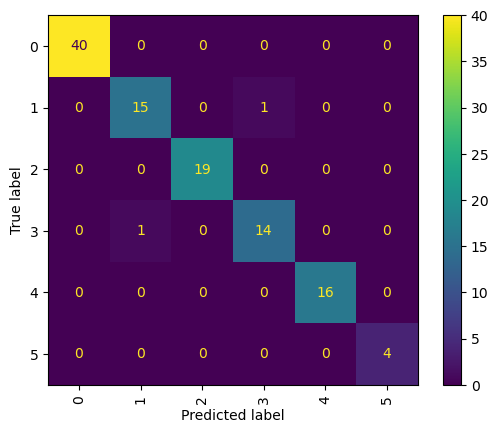

In [ ]:
# Confusion Matrix In different Visualizing way
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_logreg1, xticks_rotation='vertical')
 # Same result
#ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_logreg1)

> 2) KNearestNeighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # Model import

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(rs_data,y_encoded, test_size=0.3, random_state=42)

In [ ]:
# Data balancing using SMOTE 
## Data balancing
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote1,y_smote1 = smote.fit_resample(X_train1,y_train1)

In [ ]:
X_train1 = x_smote1.copy()

In [ ]:
y_train1 = y_smote1.copy()

In [ ]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train1,y_train1)

KNeighborsClassifier()

In [ ]:
y_train_pred_knn=knn_clf.predict(X_train1)
y_test_pred_knn=knn_clf.predict(X_test1)

In [ ]:
#Evaluate KNN model:

print("KNN training set score: %f" % f1_score(y_train1, y_train_pred_knn,average='weighted'))
print("KNN test set score: %f" % f1_score(y_test1, y_test_pred_knn,average='weighted'))

KNN training set score: 0.981523
KNN test set score: 0.964019


In [ ]:
knn_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

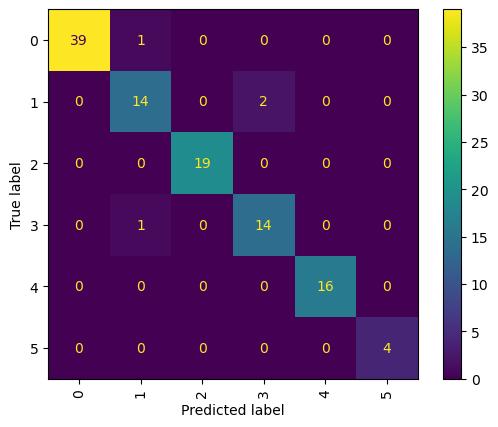

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test1, y_test_pred_knn, xticks_rotation='vertical')

In [ ]:
X_test1.shape

(110, 30)

In [ ]:
y_test1.ndim

1

In [ ]:
type(y_test1)

numpy.ndarray

In [ ]:
y_test_pred_knn.ndim

1

In [ ]:
type(y_test_pred_knn)

numpy.ndarray

In [ ]:
# To get the optimum Number of neighbors
Error_rate =[]
for k in range(1,20):
    knn_clf = KNeighborsClassifier(n_neighbors = k)
    knn_clf.fit(X_train1,y_train1)
    y_pred = knn_clf.predict(X_test1)
    Error_rate.append(np.mean(y_test1 != y_pred))

Text(0, 0.5, 'error rate')

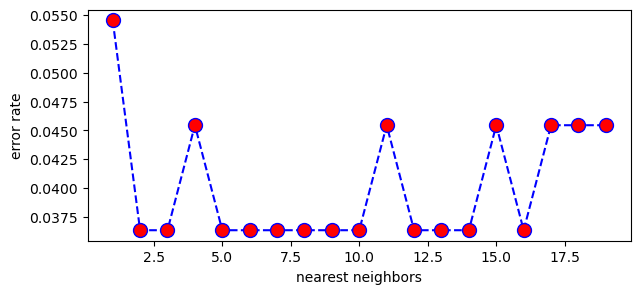

In [ ]:
# Neighbors V/s Error rate Graph
plt.figure(figsize=(7,3))
plt.plot(range(1,20),Error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('nearest neighbors')
plt.ylabel('error rate')

In [ ]:
knn_clf = KNeighborsClassifier()

In [ ]:
# Hyper parameter tuning 

params_KNN_C = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20],
         'weights':["uniform", "distance"],
         'metric':['minkowski', 'chebyshev'],
         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
         'leaf_size': [20,30,40],
         'p': [1,2]}
grid = GridSearchCV(knn_clf,params_KNN_C,verbose = 1,cv=3,scoring='f1') # cross validation score do multiple calculation for diff diff datsets
# fitting the model for grid search
grid.fit(X_train1,y_train1)

Fitting 3 folds for each of 1824 candidates, totalling 5472 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40],
                         'metric': ['minkowski', 'chebyshev'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='f1', verbose=1)

In [ ]:
grid.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'metric': 'minkowski',
 'n_neighbors': 1,
 'p': 1,
 'weights': 'uniform'}

In [ ]:
# Now create a model object with best parameters
knn_clf1 = KNeighborsClassifier(algorithm='auto',leaf_size=20,metric='minkowski',n_neighbors=1,p=1,weights='uniform')
knn_clf1.fit(X_train1,y_train1)

KNeighborsClassifier(leaf_size=20, n_neighbors=1, p=1)

In [ ]:
y_train_pred_knn1=knn_clf1.predict(X_train1)
y_test_pred_knn1=knn_clf1.predict(X_test1)

In [ ]:
#Evaluate KNN model:

print("KNN hyper tuned training set score: %f" % f1_score(y_train1, y_train_pred_knn1,average='weighted'))
print("KNN  hyper tuned test set score: %f" % f1_score(y_test1, y_test_pred_knn1,average='weighted'))

KNN hyper tuned training set score: 1.000000
KNN  hyper tuned test set score: 0.945111


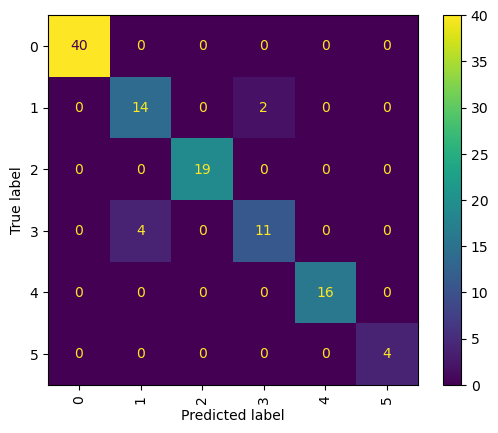

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test1, y_test_pred_knn1, xticks_rotation='vertical')

> 3) SVC(Support Vector Classifier)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_clf = SVC()
svc_clf.fit(X_train, y_train)

SVC()

In [ ]:
y_train_pred_svc=svc_clf.predict(X_train)
y_test_pred_svc=svc_clf.predict(X_test)

In [ ]:
#Evaluate SVC model:

print("SVC training set score: %f" % f1_score(y_train, y_train_pred_svc,average='weighted'))
print("SVC test set score: %f" % f1_score(y_test, y_test_pred_svc,average='weighted'))

SVC training set score: 0.997685
SVC test set score: 0.963407


In [ ]:
svc_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
svc_cm=confusion_matrix(y_test, y_test_pred_svc)
print('confusion_matrix:')
print(svc_cm)

confusion_matrix:
[[40  0  0  0  0  0]
 [ 0 15  0  1  0  0]
 [ 0  0 19  0  0  0]
 [ 0  3  0 12  0  0]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0  4]]


In [ ]:
# Classification Report
print(classification_report(y_test, y_test_pred_svc, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        40
     seboreic_dermatitis       0.83      0.94      0.88        16
           lichen_planus       1.00      1.00      1.00        19
        pityriasis_rosea       0.92      0.80      0.86        15
       cronic_dermatitis       1.00      1.00      1.00        16
pityriasis_rubra_pilaris       1.00      1.00      1.00         4

                accuracy                           0.96       110
               macro avg       0.96      0.96      0.96       110
            weighted avg       0.97      0.96      0.96       110



In [ ]:
svc_clf = SVC(random_state=42)

In [ ]:
# Hyper parameter tuning in SVM 
from sklearn.model_selection import GridSearchCV
# it work for us with predefined parameters by us
#It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. 
#So,in the end, you can select the best parameters from the listed hyperparameters.

# defining parameters
parameters = {'C': [0.1, 1, 10, 100, 1000,10000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,0.00001]} 
grid = GridSearchCV(svc_clf,parameters, refit = True,verbose = 1,cv=3) # cross validation score do multiple calculation for diff diff datsets
# fitting the model for grid search
grid.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05]},
             verbose=1)

In [ ]:
grid.best_params_

{'C': 1000, 'gamma': 0.001}

In [ ]:
# Now create a model object with best parameters
svc_clf1 = SVC(C=1000, gamma = 0.001)
svc_clf1.fit(X_train,y_train)

SVC(C=1000, gamma=0.001)

In [ ]:
y_train_pred_svc1=svc_clf1.predict(X_train)
y_test_pred_svc1=svc_clf1.predict(X_test)

In [ ]:
#Evaluate SVC model:

print("SVC training set score: %f" % f1_score(y_train, y_train_pred_svc1,average='weighted'))
print("SVC test set score: %f" % f1_score(y_test, y_test_pred_svc1,average='weighted'))

SVC training set score: 1.000000
SVC test set score: 0.981818


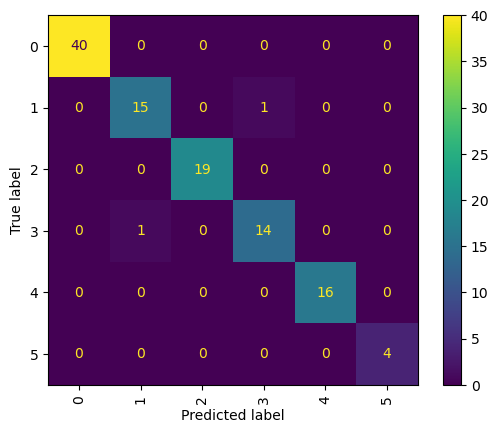

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test1, y_test_pred_svc1, xticks_rotation='vertical')

> 4) Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rand_clf = RandomForestClassifier(random_state=42)

In [ ]:
rand_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_train_pred_rand=rand_clf.predict(X_train)
y_test_pred_rand=rand_clf.predict(X_test)

In [ ]:
#Evaluate DT model:

print("Random Forest training set score: %f" % f1_score(y_train, y_train_pred_rand,average='weighted'))
print("Random Forest test set score: %f" % f1_score(y_test, y_test_pred_rand,average='weighted'))

Random Forest training set score: 1.000000
Random Forest test set score: 0.963407


In [ ]:
rand_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# From above score we can see overfitting in training model 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
grid_param = {'n_estimators': [10,30,50,70,80,90,100],
            'max_depth':[1, 2 , 4, 6, 8, 10,None],
            'min_samples_leaf':[1, 2 , 4, 6, 8, 10,None],
            'min_samples_split':[2 , 4, 6, 8, 10],
            'criterion':['gini','entropy'],
            'max_features':['auto','log2','sqrt',None],
            'bootstrap':[True, False],
            'random_state': [42]
}


In [ ]:
# Instantiate the grid search model
grid = RandomizedSearchCV(estimator=rand_clf,param_distributions=grid_param,cv=5,n_jobs=-1, verbose=True, scoring='f1')

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 4, 6, 8, 10, None],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10,
                                                             None],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [10, 30, 50, 70, 80, 90,
                                                         100],
                                        'random_state': [42]},
                   scoring='f1', verbose=True)

In [ ]:
grid.best_params_

{'random_state': 42,
 'n_estimators': 30,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 4,
 'criterion': 'entropy',
 'bootstrap': True}

In [ ]:
rand_clf1 = RandomForestClassifier(n_estimators = 30, min_samples_split = 4, min_samples_leaf = 2, max_features= None, max_depth = 4, bootstrap = True,criterion='entropy',random_state=42)

rand_clf1.fit(X_train, y_train)

y_train_pred_rand1=rand_clf1.predict(X_train)
y_test_pred_rand1=rand_clf1.predict(X_test)

In [ ]:
#Evaluate RandomForest model:

print("Random forest hyper tuned training set score: %f" % f1_score(y_train, y_train_pred_rand1,average='weighted'))
print("Ranom forest hyper tuned test set score: %f" % f1_score(y_test, y_test_pred_rand1,average='weighted'))

Random forest hyper tuned training set score: 0.972559
Ranom forest hyper tuned test set score: 0.912725


In [ ]:
rand_cm=confusion_matrix(y_test, y_test_pred_rand1)
print('confusion_matrix:')
print(rand_cm)

confusion_matrix:
[[40  0  0  0  0  0]
 [ 0 15  0  1  0  0]
 [ 0  1 17  1  0  0]
 [ 0  4  0 11  0  0]
 [ 0  2  0  0 14  0]
 [ 0  1  0  0  0  3]]


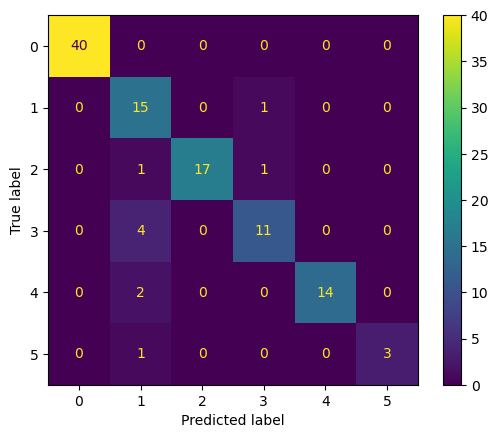

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred_rand1)

In [ ]:
# Classification Report
print(classification_report(y_test, y_test_pred_rand1, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        40
     seboreic_dermatitis       0.65      0.94      0.77        16
           lichen_planus       1.00      0.89      0.94        19
        pityriasis_rosea       0.85      0.73      0.79        15
       cronic_dermatitis       1.00      0.88      0.93        16
pityriasis_rubra_pilaris       1.00      0.75      0.86         4

                accuracy                           0.91       110
               macro avg       0.92      0.87      0.88       110
            weighted avg       0.93      0.91      0.91       110



> 5) XGboost Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_clf=XGBClassifier(random_state=42) ## object creation


In [ ]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [ ]:
y_train_pred_xgb=xgb_clf.predict(X_train)
y_test_pred_xgb=xgb_clf.predict(X_test)

In [ ]:
# Evaluate XGB model:

print("XGB training set score: %f" % f1_score(y_train, y_train_pred_xgb,average='weighted'))
print("XGB test set score: %f" % f1_score(y_test, y_test_pred_xgb,average='weighted'))

XGB training set score: 1.000000
XGB test set score: 0.954708


In [ ]:
xgb_cm=confusion_matrix(y_test, y_test_pred_xgb)
print('confusion_matrix:')
print(xgb_cm)

confusion_matrix:
[[40  0  0  0  0  0]
 [ 0 15  0  1  0  0]
 [ 0  0 18  1  0  0]
 [ 0  3  0 12  0  0]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0  4]]


In [ ]:
# Classification Report
print(classification_report(y_test, y_test_pred_xgb, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        40
     seboreic_dermatitis       0.83      0.94      0.88        16
           lichen_planus       1.00      0.95      0.97        19
        pityriasis_rosea       0.86      0.80      0.83        15
       cronic_dermatitis       1.00      1.00      1.00        16
pityriasis_rubra_pilaris       1.00      1.00      1.00         4

                accuracy                           0.95       110
               macro avg       0.95      0.95      0.95       110
            weighted avg       0.96      0.95      0.95       110



In [ ]:
xgb_clf.get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': None,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_threshold': 64,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [ ]:
# Hyperparameter Tuning in XGb
from sklearn.model_selection import RandomizedSearchCV

params = {'learning_rate': [0.01,0.02, 0.03,0.04,0.05, 0.06, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.001,0.0001],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'max_depth': [3, 4, 5, 7, 9, 11, 13, 15, None],
              'n_estimators': [10,20,30,40,50,60,70,80,90,100],
              'reg_lambda': [0,0.1,0.2,1,10],
              'gamma': [0,0.1,0.2,0.4,1,None]}

In [ ]:
xgb_clf = XGBClassifier()

In [ ]:
xgb_clf1= RandomizedSearchCV(estimator =xgb_clf,param_distributions=params, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1,scoring='f1')

In [ ]:
xgb_clf1.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'gamma': [0, 0.1, 0.2, 0.4, 1, None],
                                        'learning_rate': [0.01, 0.02, 0.03,
                                                          0.04, 0.05, 0.06, 0.1,
                                                          0.2, 0.3, 0.4, 0.5,
                                                          0.6, 0.7, 0.001,
                                                          0.0001],
                                        'max_depth': [3, 4, 5, 7, 9, 11, 13, 15,
                                                      None],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8,
                                                      1.6, 3.2, 6.4, 12.8, 25.6,
                                                      51.2, 102.4, 200],
                                        'reg_lambda': [0, 0.1, 0.2, 1, 10]},
                   random_state=42, scoring='f1', verbose=2)

In [ ]:
xgb_clf1.best_params_

{'reg_lambda': 1,
 'reg_alpha': 0.4,
 'n_estimators': 70,
 'max_depth': 15,
 'learning_rate': 0.06,
 'gamma': 0.1}

In [ ]:
xgb_clf1=XGBClassifier(reg_lambda= 1, reg_alpha= 0.4, n_estimators=70, max_depth=15, learning_rate=0.06, gamma=0.1)
xgb_clf1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.06, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=15, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=70, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [ ]:
y_train_pred_xgb1=xgb_clf1.predict(X_train)
y_test_pred_xgb1=xgb_clf1.predict(X_test)

In [ ]:
# Evaluate XGB model:

print("XGB hypertuned training set score: %f" % f1_score(y_train, y_train_pred_xgb1,average='weighted')) # Lr = 0.2, 1.000000
print("XGB hypertuned test set score: %f" % f1_score(y_test, y_test_pred_xgb1,average='weighted')) # lr = 0.2, 0.936364(0.06, 0.945455)

XGB hypertuned training set score: 0.997685
XGB hypertuned test set score: 0.972670


In [ ]:
xgb_cm=confusion_matrix(y_test, y_test_pred_xgb1)
print('confusion_matrix:')
print(xgb_cm)

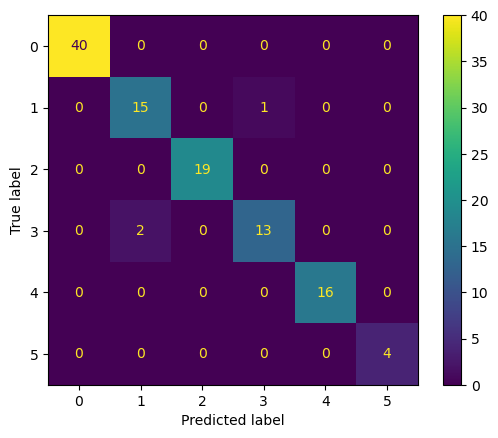

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred_xgb1)

In [ ]:
# Classification Report
print(classification_report(y_test, y_test_pred_xgb1, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        40
     seboreic_dermatitis       0.88      0.94      0.91        16
           lichen_planus       1.00      1.00      1.00        19
        pityriasis_rosea       0.93      0.87      0.90        15
       cronic_dermatitis       1.00      1.00      1.00        16
pityriasis_rubra_pilaris       1.00      1.00      1.00         4

                accuracy                           0.97       110
               macro avg       0.97      0.97      0.97       110
            weighted avg       0.97      0.97      0.97       110



> 6) ANN classifier

In [ ]:
# model creation 
from sklearn.neural_network import MLPClassifier # MLP stands for Multi Layer Perceptron 
ann_clf = MLPClassifier(random_state=42)
ann_clf.fit(X_train,y_train)


MLPClassifier(random_state=42)

In [ ]:
y_train_pred_ann=ann_clf.predict(X_train)
y_test_pred_ann=ann_clf.predict(X_test)

In [ ]:
# Evaluate XGB model:

print("XGB hypertuned training set score: %f" % f1_score(y_train, y_train_pred_ann,average='weighted'))
print("XGB hypertuned test set score: %f" % f1_score(y_test, y_test_pred_ann,average='weighted'))

XGB hypertuned training set score: 1.000000
XGB hypertuned test set score: 0.972670


In [ ]:
ann_clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
params = {'hidden_layer_sizes':[50,60,70,80,90,100,110],
         'activation':['identity', 'logistic', 'tanh', 'relu'],
         'solver':['lbfgs', 'sgd', 'adam'],
         'learning_rate' : ['constant', 'invscaling', 'adaptive'],
          'learning_rate_init':[0.1],
          'alpha':[0.1,0.2,0.3,0.01,0.02,0.001,0.002,0.0001,0.0002]
         }

In [ ]:
ann_clf1=MLPClassifier(random_state=42)

In [ ]:
ann_clf2=MLPClassifier(random_state=42)

In [ ]:
ann_clf1= RandomizedSearchCV(estimator =ann_clf1,param_distributions=params, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1,scoring='f1')

In [ ]:
ann_clf2= GridSearchCV(estimator =ann_clf2,param_grid=params, cv=3, 
                               verbose=2, n_jobs=-1,scoring='f1')

In [ ]:
ann_clf1.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=MLPClassifier(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'alpha': [0.1, 0.2, 0.3, 0.01, 0.02,
                                                  0.001, 0.002, 0.0001,
                                                  0.0002],
                                        'hidden_layer_sizes': [50, 60, 70, 80,
                                                               90, 100, 110],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'learning_rate_init': [0.1],
                                        'solver': ['lbfgs', 'sgd', 'adam']},
                   random_state=42, scoring='f1', verbose=2)

In [ ]:
ann_clf2.fit(X_train,y_train)

Fitting 3 folds for each of 2268 candidates, totalling 6804 fits


GridSearchCV(cv=3, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.1, 0.2, 0.3, 0.01, 0.02, 0.001, 0.002,
                                   0.0001, 0.0002],
                         'hidden_layer_sizes': [50, 60, 70, 80, 90, 100, 110],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'learning_rate_init': [0.1],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='f1', verbose=2)

In [ ]:
ann_clf1.best_params_

{'solver': 'adam',
 'learning_rate_init': 0.1,
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': 110,
 'alpha': 0.3,
 'activation': 'identity'}

In [ ]:
ann_clf2.best_params_

{'activation': 'identity',
 'alpha': 0.1,
 'hidden_layer_sizes': 50,
 'learning_rate': 'constant',
 'learning_rate_init': 0.1,
 'solver': 'lbfgs'}

In [ ]:
from sklearn.neural_network import MLPClassifier
ann_clf1 = MLPClassifier(solver='adam',max_iter=100,learning_rate_init=0.1,hidden_layer_sizes=(110,3),learning_rate='adaptive',alpha=0.3,activation='identity')  # 3 layers with 100 roots each 
ann_clf1.fit(X_train,y_train)


MLPClassifier(activation='identity', alpha=0.3, hidden_layer_sizes=(110, 3),
              learning_rate='adaptive', learning_rate_init=0.1, max_iter=100)

In [ ]:
from sklearn.neural_network import MLPClassifier
ann_clf2 = MLPClassifier(solver='lbfgs',max_iter=100,learning_rate_init=0.1,hidden_layer_sizes=(50,3),learning_rate='constant',alpha=0.1,activation='identity')  # 3 layers with 50 roots each 
ann_clf2.fit(X_train,y_train)


MLPClassifier(activation='identity', alpha=0.1, hidden_layer_sizes=(50, 3),
              learning_rate_init=0.1, max_iter=100, solver='lbfgs')

In [ ]:
y_train_pred_ann1=ann_clf1.predict(X_train)
y_test_pred_ann1=ann_clf1.predict(X_test)

In [ ]:
y_train_pred_ann2=ann_clf2.predict(X_train)
y_test_pred_ann2=ann_clf2.predict(X_test)

In [ ]:
# Evaluate ANN model for Randomised Search CV:

print("ANN hypertuned training set score: %f" % f1_score(y_train, y_train_pred_ann1,average='weighted'))
print("ANN hypertuned test set score: %f" % f1_score(y_test, y_test_pred_ann1,average='weighted'))

ANN hypertuned training set score: 0.990734
ANN hypertuned test set score: 0.955187


In [ ]:
# Evaluate ANN model for GridSearch CV:

print("ANN hypertuned training set score: %f" % f1_score(y_train, y_train_pred_ann2,average='weighted'))
print("ANN hypertuned test set score: %f" % f1_score(y_test, y_test_pred_ann2,average='weighted'))

ANN hypertuned training set score: 1.000000
ANN hypertuned test set score: 0.973044


## Model Comparison

In [ ]:
# Without Hyper Parameter Tuned Models
Model_Comparison= pd.DataFrame({'Model':['Logistic Regressor',
                                         'KNN Classifier',
                                         'Support Vector Classifier',  
                                         'Random Forest Classifier',
                                         'XG Boosting Classifier',
                                         'ANN classifier'],
                                'Train Score':[f1_score(y_train, y_train_pred_logR,average='weighted'),
                                               f1_score(y_train, y_train_pred_knn,average='weighted'), 
                                               f1_score(y_train, y_train_pred_svc,average='weighted'),
                                               f1_score(y_train, y_train_pred_rand,average='weighted'), 
                                               f1_score(y_train,y_train_pred_xgb,average='weighted'),
                                              f1_score(y_train,y_train_pred_ann,average='weighted')],
                                'Test Score':[f1_score(y_test, y_test_pred_logR,average='weighted'),
                                              f1_score(y_test, y_test_pred_knn,average='weighted'),
                                              f1_score(y_test, y_test_pred_svc,average='weighted'),
                                              f1_score(y_test, y_test_pred_rand,average='weighted'),
                                              f1_score(y_test, y_test_pred_xgb,average='weighted'),
                                             f1_score(y_test,y_test_pred_ann,average='weighted')]})
Model_Comparison.set_index('Model', drop=True, inplace=True)
Model_Comparison

Train Score  Test Score
Model                                             
Logistic Regressor            0.997685    0.955187
KNN Classifier                0.981523    0.964019
Support Vector Classifier     0.997685    0.963407
Random Forest Classifier      1.000000    0.963407
XG Boosting Classifier        1.000000    0.954708
ANN classifier                1.000000    0.972670

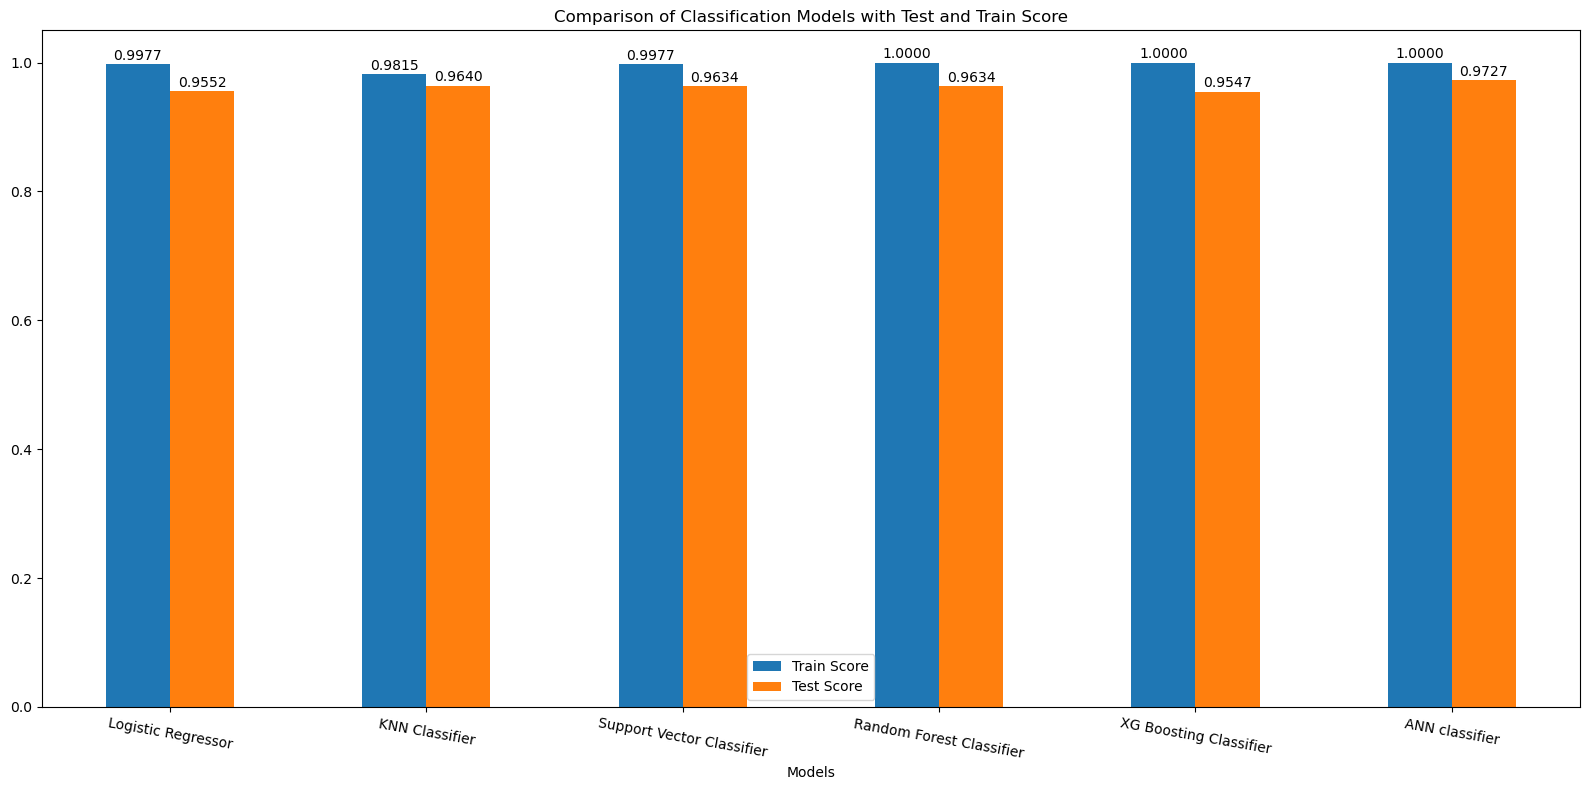

In [ ]:
# Plotting Barplot for the Comparison
ax= Model_Comparison.plot(kind='bar', figsize=(16,8), xlabel="Models")
plt.title("Comparison of Classification Models with Test and Train Score")
plt.xticks(rotation=350)
plt.tight_layout()
for i in ax.containers:
    ax.bar_label(i, padding=1.0, fmt='%.4f')

In [ ]:
# Hyper parameter Tuned Model
Model_Comparison_tuned= pd.DataFrame({'Model':['Logistic Regressor',
                                         'KNN Classifier',
                                         'Support Vector Classifier',  
                                         'Random Forest Classifier',
                                         'XG Boosting Classifier',
                                         'ANN classifier'],
                                'Train Score':[f1_score(y_train, y_train_pred_logreg1,average='weighted'),
                                               f1_score(y_train, y_train_pred_knn1,average='weighted'), 
                                               f1_score(y_train, y_train_pred_svc1,average='weighted'),
                                               f1_score(y_train, y_train_pred_rand1,average='weighted'), 
                                               f1_score(y_train,y_train_pred_xgb1,average='weighted'),
                                              f1_score(y_train,y_train_pred_ann2,average='weighted')],
                                'Test Score':[f1_score(y_test, y_test_pred_logreg1,average='weighted'),
                                              f1_score(y_test, y_test_pred_knn1,average='weighted'),
                                              f1_score(y_test, y_test_pred_svc1,average='weighted'),
                                              f1_score(y_test, y_test_pred_rand1,average='weighted'),
                                              f1_score(y_test, y_test_pred_xgb1,average='weighted'),
                                             f1_score(y_test,y_test_pred_ann2,average='weighted')]})
Model_Comparison_tuned.set_index('Model', drop=True, inplace=True)
Model_Comparison_tuned

Train Score  Test Score
Model                                             
Logistic Regressor            1.000000    0.981818
KNN Classifier                1.000000    0.945111
Support Vector Classifier     1.000000    0.981818
Random Forest Classifier      0.972559    0.912725
XG Boosting Classifier        0.997685    0.972670
ANN classifier                1.000000    0.973044

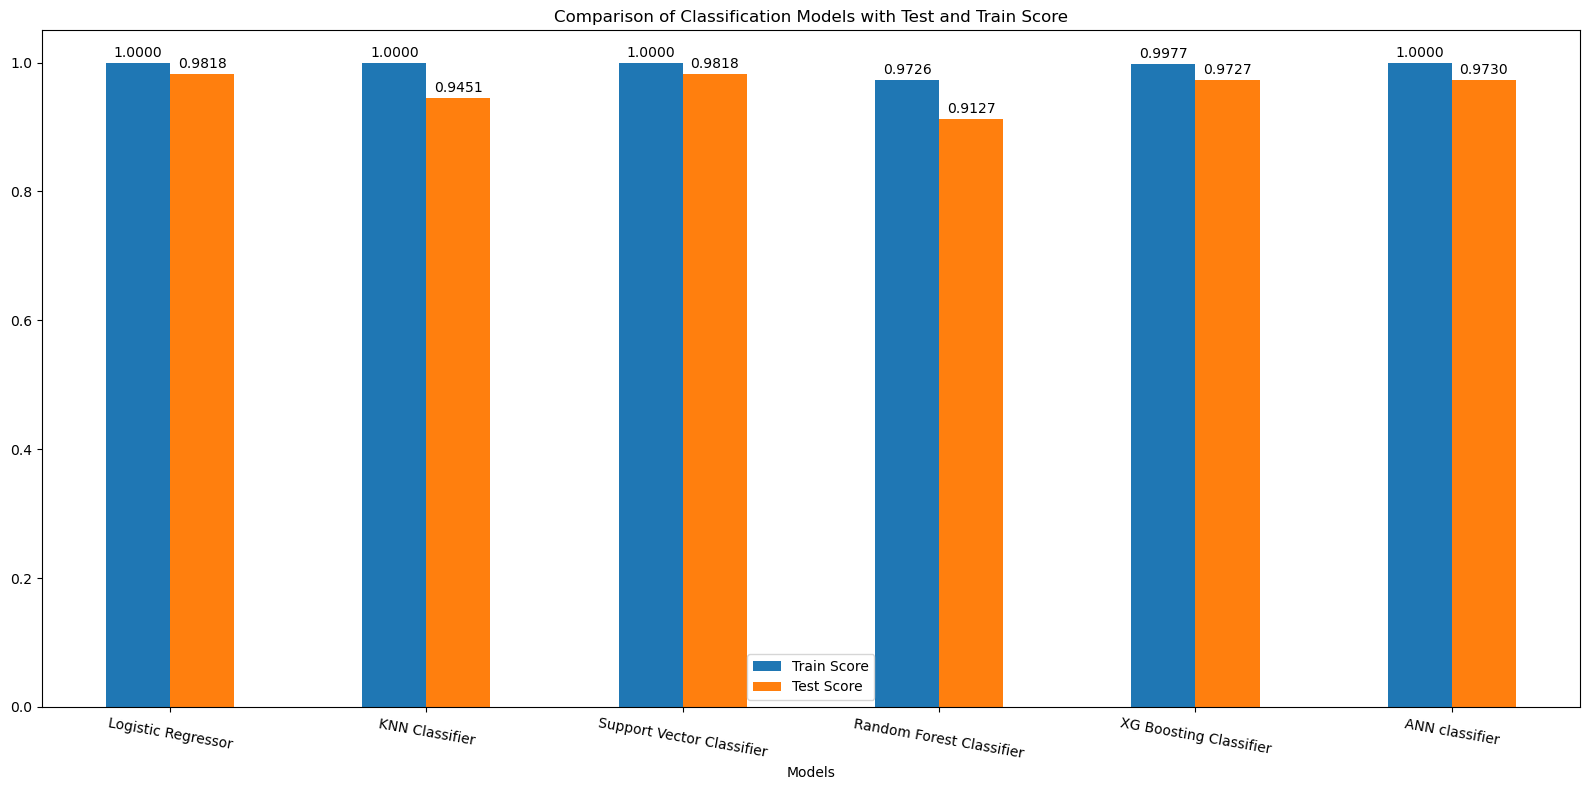

In [ ]:
# Plotting Barplot for the Comparison
ax= Model_Comparison_tuned.plot(kind='bar', figsize=(16,8), xlabel="Models")
plt.title("Comparison of Classification Models with Test and Train Score")
plt.xticks(rotation=350)
plt.tight_layout()
for i in ax.containers:
    ax.bar_label(i, padding=2.0, fmt='%.4f')

## SUMMARY
The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences. The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris. Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well. Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages. Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features. The values of the histopathological features are determined by an analysis of the samples under a microscope.

The Primary objective is to build a machine learning techniques, which can effectively differentiate skin disease classification.

**METHODOLOGY FOLLOWED**


> The dataset contains  12 clinical features and 22 histopathological features, the feature family history has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.

> Exploratory data analysis has been carried out on each features and their relationship with other features.

> The age feature had NAN values and zero values which was handled using the median of the age feature.

> Correlation of the features has been captured using heatmap.

**INSIGHTS FROM EDA:**

> The distribution of 12 clinical features and 22 histopathological features in the dataset with 366 instances is depicted using histogram and KDE plot.

> Dieseases like Lichen_Planus, Cronic_Dermatitis,and Pityriasis_Rosea does not show any relation of tranfer within family members. Also, theses diseases can occurs in early ages till the age of 70 years is also as seen from the distribution.

> Diseases like Psoriasis and Pityriasis_rubra_pilaris shows strong relation of transfer from family and disease Seboreic_Dermatitis too shows a some relation of transfer within family members.

> Disease like Pityriasis_rubra_pilaris shows its presence in early ages and till the age of 15 to 20 years only.

> Diseases like Psoriasis and Seboreic_Dermatitis shows its presence in early ages and till the age of 70 years.

> The Disease / target class count plot showed imbalanced values between diffrent classes which was balanced using combination of SMOTE and edited nearest neighbor technique.

> Heatmap is used to find the correlation between the features too.
 

**INSIGHTS FROM CLASSIFICATION MODELS:**

***Model-1: Logistic Classifier***
> For the tuned Logistic classifer model, the  accuracy score for test and train data were 0.981 and 1 respectively.

***Model-2: KNN Classifier***
> For the  KNN classifer model, the  accuracy score for test and train data were 0.964 and 0.981 respectively. 

***Model-3: Support Vector Classifier***
> For the tuned Support Vector classifer model, the  accuracy score for test and train data were 0.981 and 1 respectively.


***Model-4: Random Forest Classifier***
> For the tuned Random Forest classifer model, the  accuracy score for test and train data were 0.963 and 1 respectively.

***Model-5: XGB Classifier***
> For the tuned XGB classifer model, the  accuracy score for test and train data were 0.997 and 0.973 respectively.


***Model-6: Artificial Neural Networks Classifier***
> Forthe tuned ANN Classifier, the accuracy score for the test and train dataset were 0.973 and 1 respectively.



All the models have been compared for accuracy score and f1 score.


**CONCLUSION:**

Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features.

From EDA, skin diseases Psoriasis and Pityriasis_rubra_pilaris shows strong relation of transfer from family members and disease Seboreic_Dermatitis too shows a some relation of transfer within family members. Skin disease like Pityriasis_rubra_pilaris shows its presence in early ages till the age of 15 to 20 years only. Skin diseases Psoriasis and Seboreic_Dermatitis shows its presence in early ages till the age of 70 years. 

Also Disease / target class count plot showed imbalanced values between diffrent classes which was balanced using a combination of SMOTE and edited nearest neighbor technique.

The 6 machine learning models have been studied and tuned and evaluated for acheiving better performance of the model using various metrices and accuracy scores.

The Linear Regression classifier Model and Support Vector classifier Model has given a better accuracy Score and F1 Score compared to remaining classifier models and hence recommend to use either of them classifier Model in order for the doctors to identify the skin diseases of the patient at the earliest.
 